## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib.pyplot import figure
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics
from sklearn import preprocessing

from sklearn.model_selection import train_test_split,GridSearchCV, KFold,cross_val_score,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.preprocessing import Normalizer, normalize
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report


## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Here we will observe the distribution of our classes

In [4]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

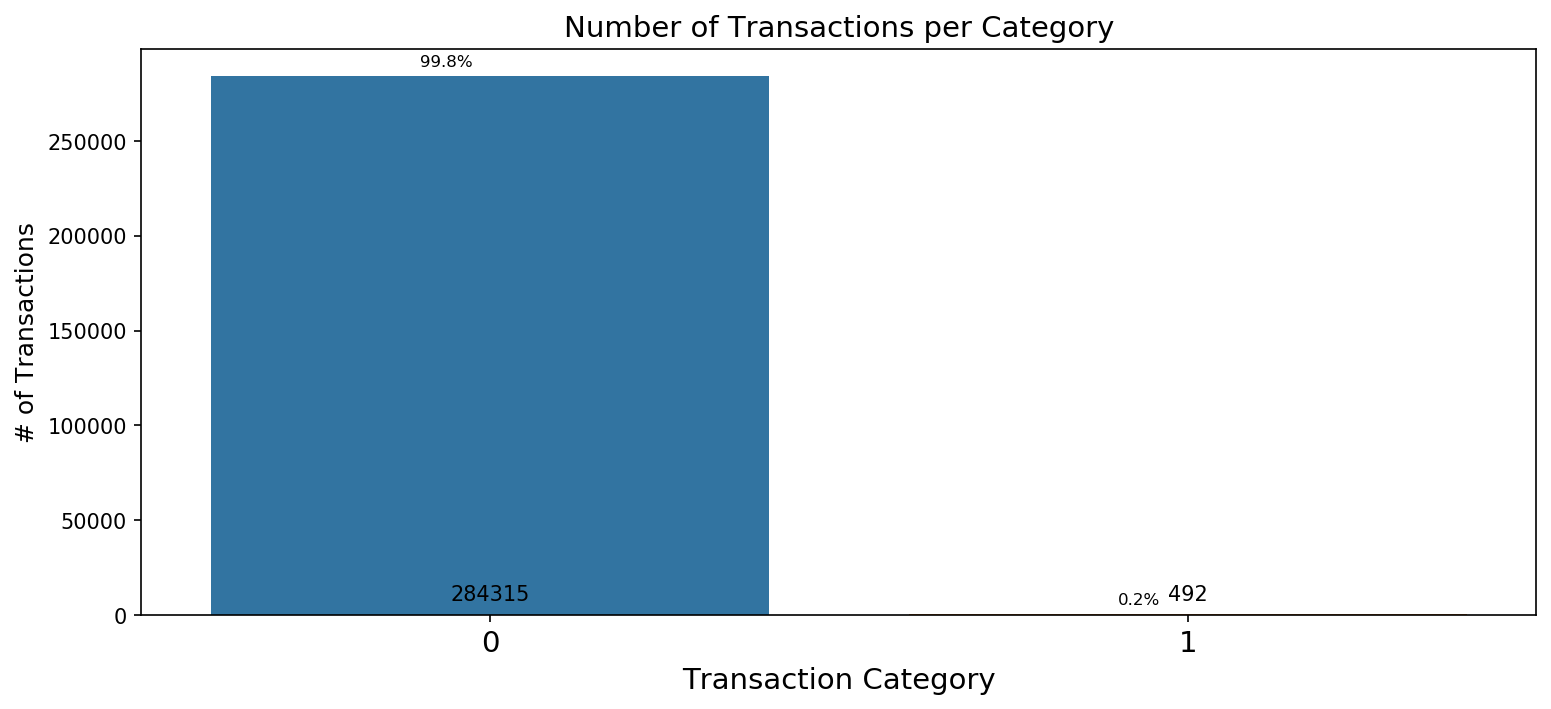

In [5]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
x = (df['Class'].value_counts()).index.tolist()
y = (df['Class'].value_counts()).to_list()
figure(num=None, figsize=(12, 5), dpi=150, facecolor='w', edgecolor='k')
ax = sns.barplot(x,y)
for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/len(df))
            x = p.get_x() + 0.3
            y = p.get_y() + p.get_height() + 5000
            ax.annotate(percentage, (x, y), fontsize=8)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., 100), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation='horizontal', fontsize=14)
plt.title("Number of Transactions per Category", fontsize=14)
plt.ylabel('# of Transactions', fontsize=12)
plt.xlabel('Transaction Category', fontsize=14)
plt.show()

__Observations__

1) The data shows a high class imbalance. Around 2,84,315 cases are mapped to 0, but hardly 492 cases are mapped to 1. 

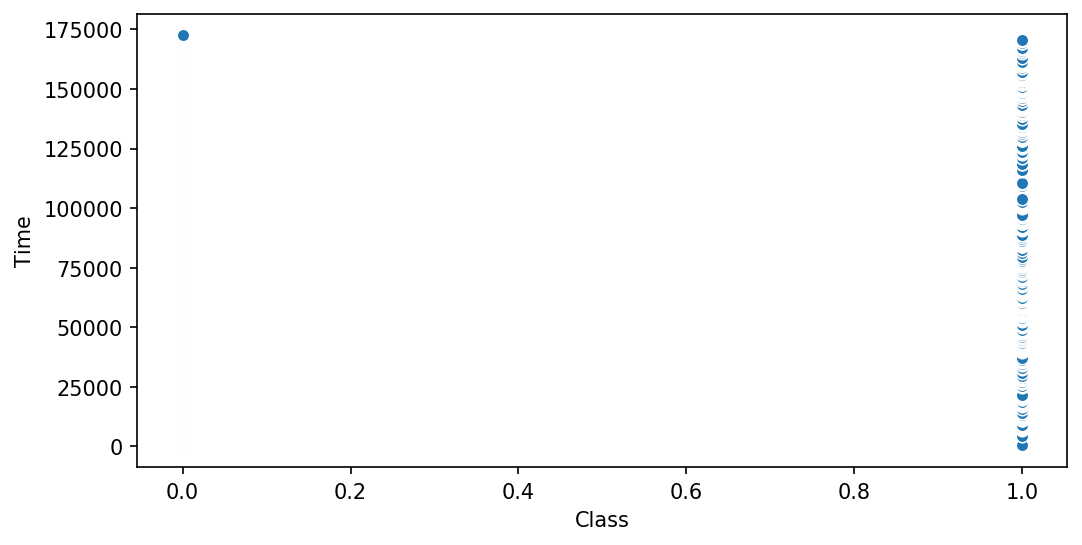

In [6]:
# Create a scatter plot to observe the distribution of classes with time
x = df["Class"]
y = df['Time']
figure(num=None, figsize=(8, 4), dpi=150, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x,y)
plt.show()

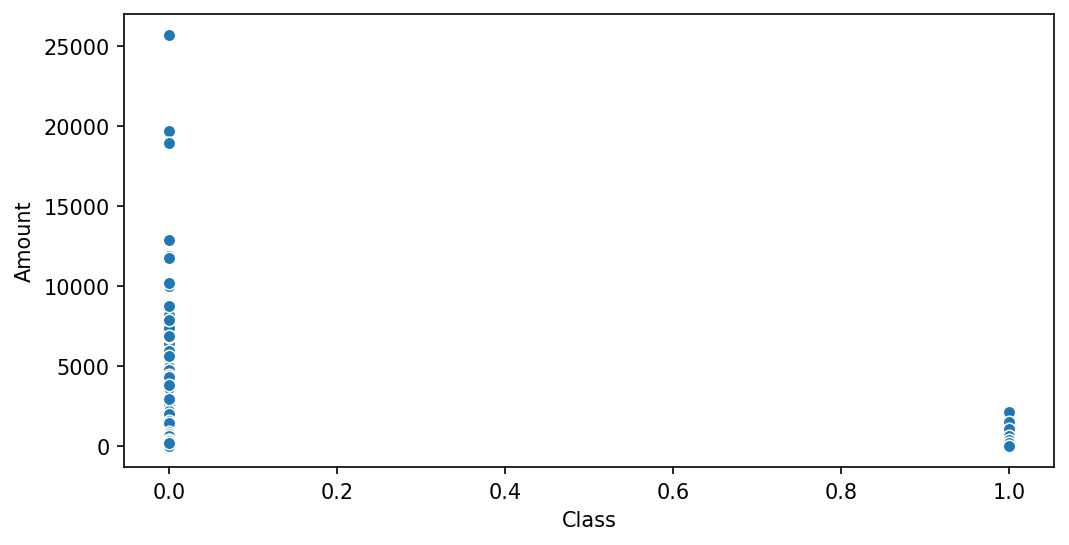

In [7]:
# Create a scatter plot to observe the distribution of classes with Amount
x = df['Class']
y = df['Amount']
figure(num=None, figsize=(8, 4), dpi=150, facecolor='w', edgecolor='k')
ax = sns.scatterplot(x,y)
#ax.set_ylim(0,1,1)
plt.show()

In [8]:
print(df[df['Class']== 0 ]["Amount"].describe())
print("*"*100)
print(df[df['Class']== 1 ]["Amount"].describe())

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
****************************************************************************************************
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


__Observations__

1) We could clearly see that average of Amount in Fraudulent Cases is higher than that of normal transactions.
2) There is no much variance in the time wrt fraud transactions and non fraud transactions. Hence time column can be dropped

In [9]:
# Drop unnecessary columns
df = df.drop(["Time"],1)
#df.info()

### Splitting the data into train & test data

In [10]:
y= df["Class"]#class variable
X = df.drop(["Class"],1)
rndm_stat = 42

In [11]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=rndm_stat,test_size=0.3,stratify = df["Class"])

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [12]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


In [13]:
df.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')

### Plotting the distribution of a variable

In [14]:
# plot the histogram of a variable from the dataset to see the skewness.
def dist_plt(l_df,n_r,n_c,*args):
    j=1
    colrs = ["dummy","skyblue","red","olive","gold","teal","green","blue","grey","pink","black"]
    fig_h = n_r * 5
    plt.figure(1,figsize=(14,fig_h))
    sns.set(style="whitegrid",font_scale=1)
    for i in args:
        plt.subplot(n_r,n_c,j)
        ax = sns.distplot(l_df[i],bins=20,color=colrs[j])
        plt.title('Distribution of {}'.format(i),fontsize=10)
        j+=1
    plt.show()

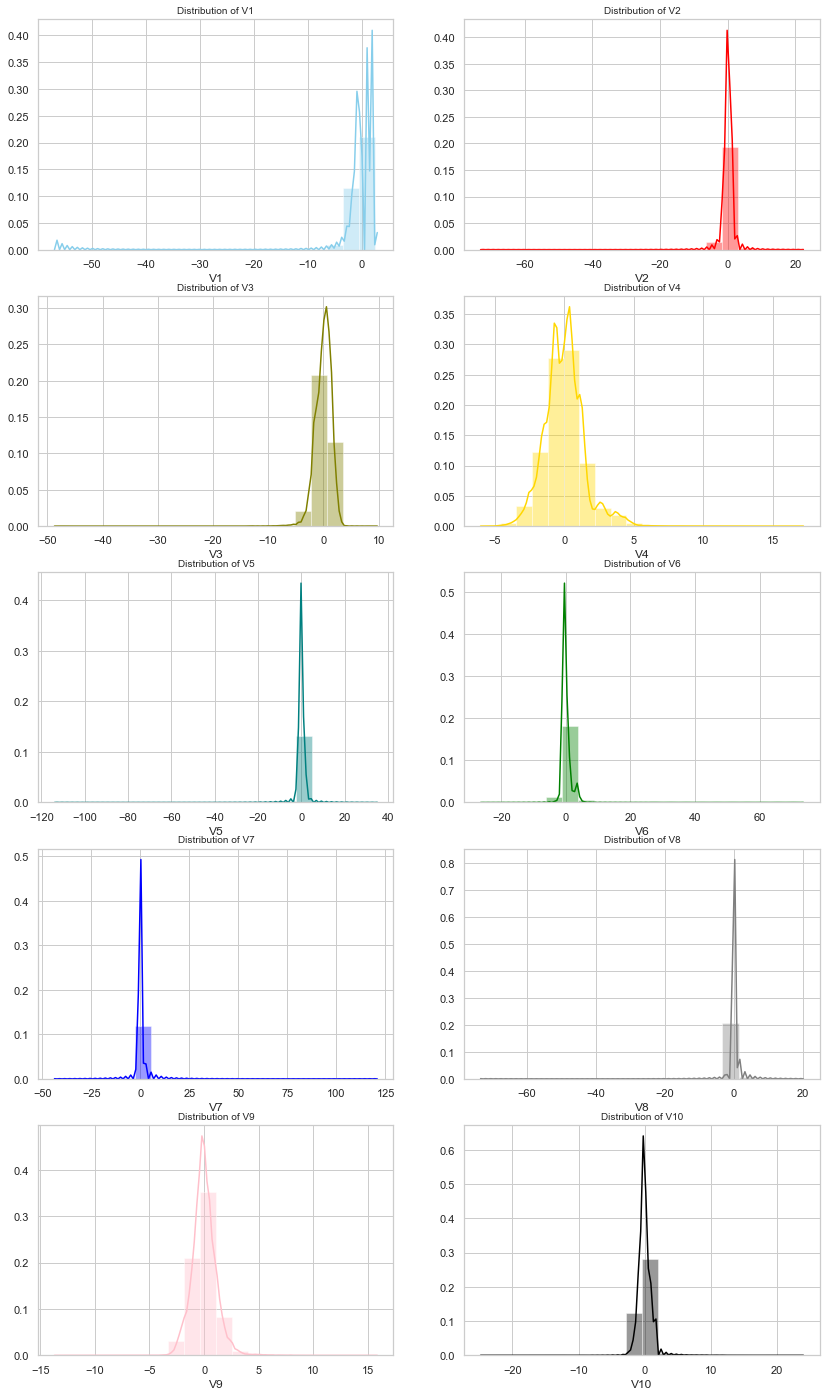

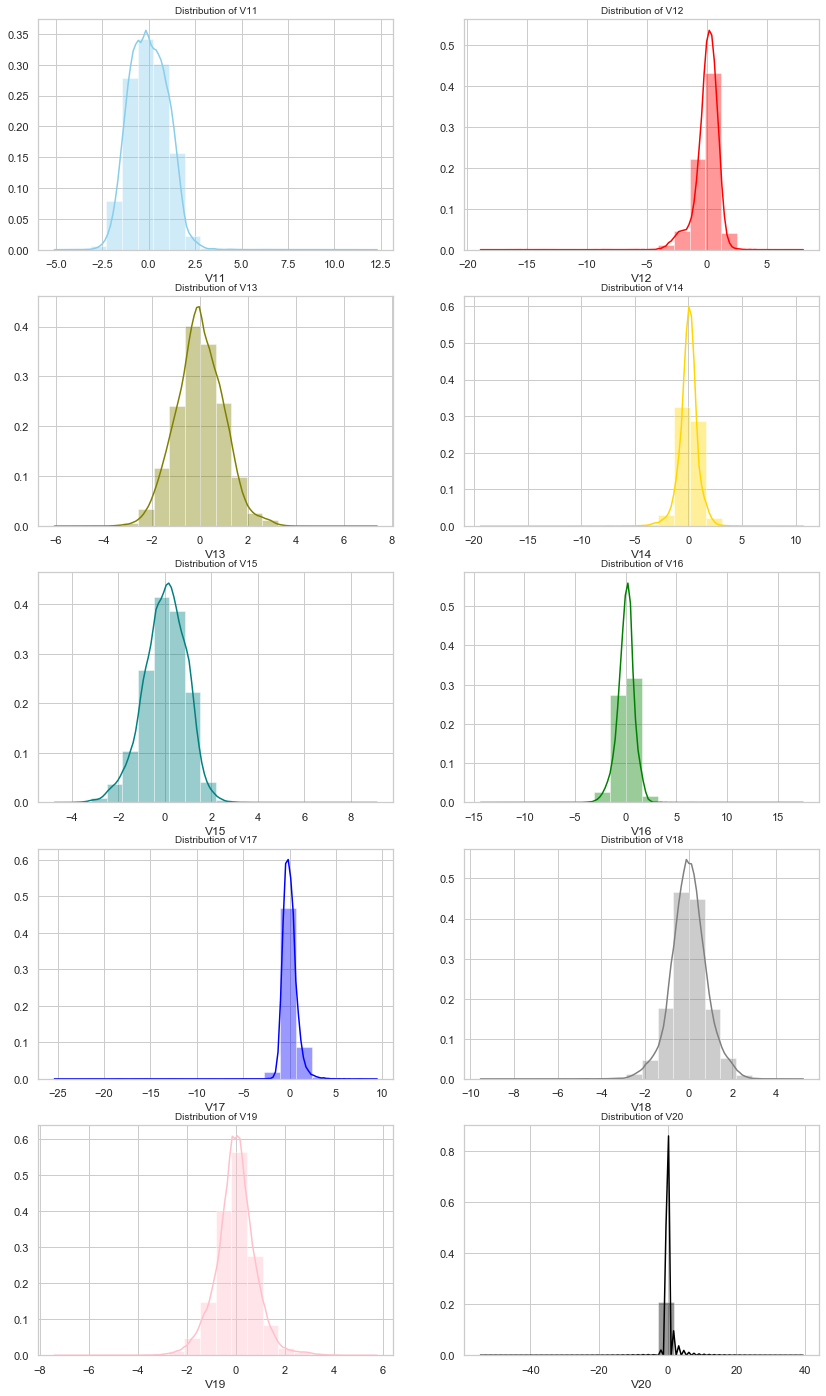

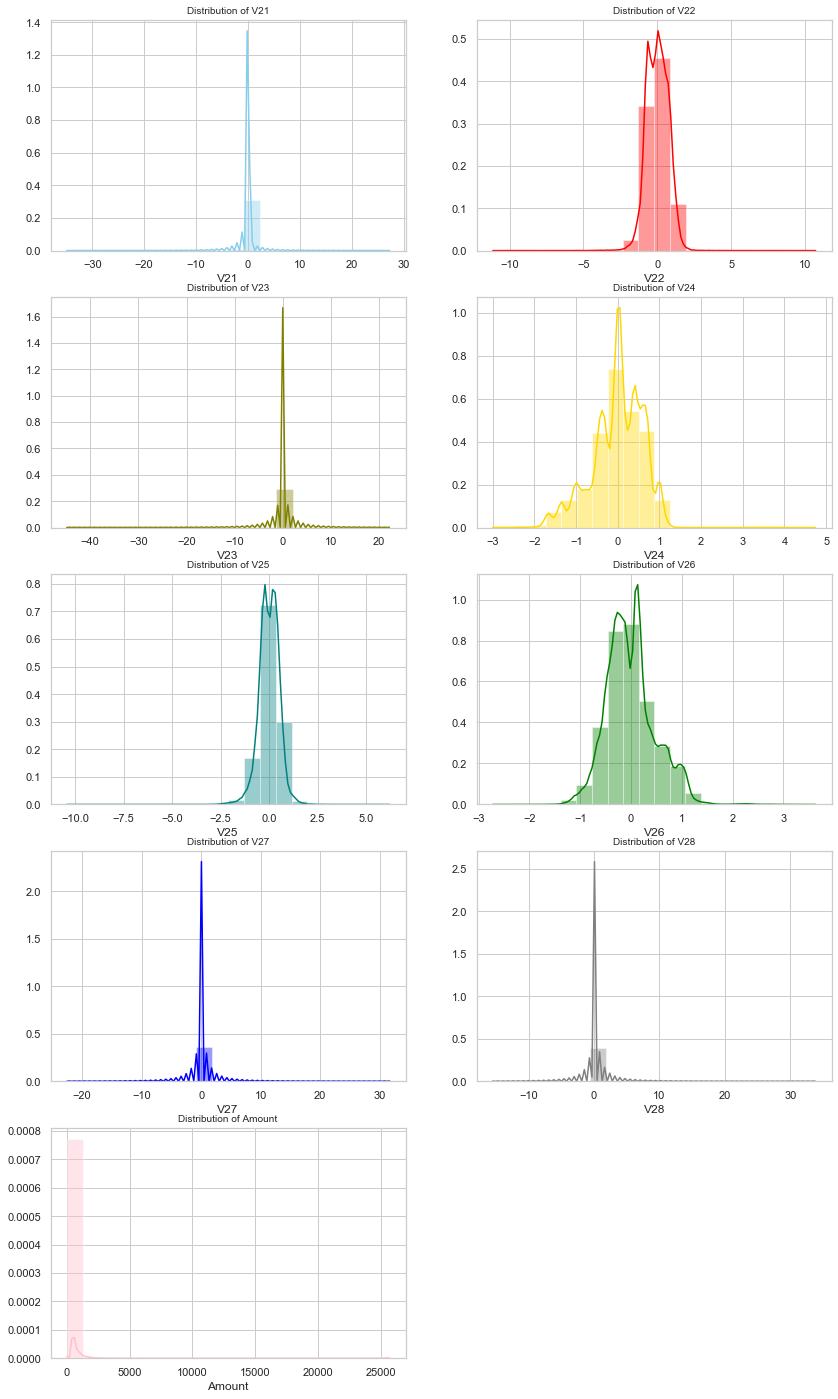

In [15]:
dist_plt(X_train,10,2,*df.columns[0:10])
dist_plt(X_train,10,2,*df.columns[10:20])
dist_plt(X_train,9,2,*df.columns[20:29])

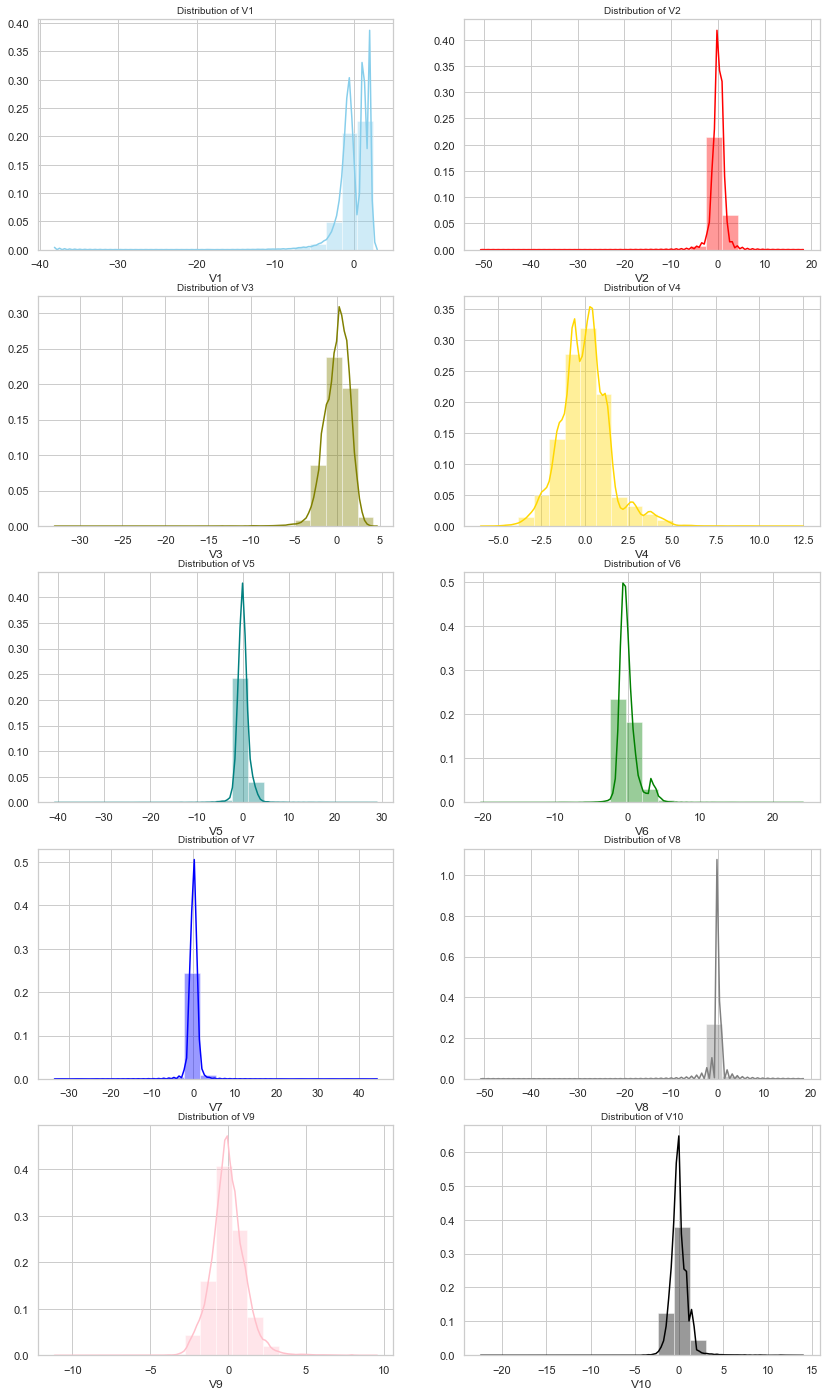

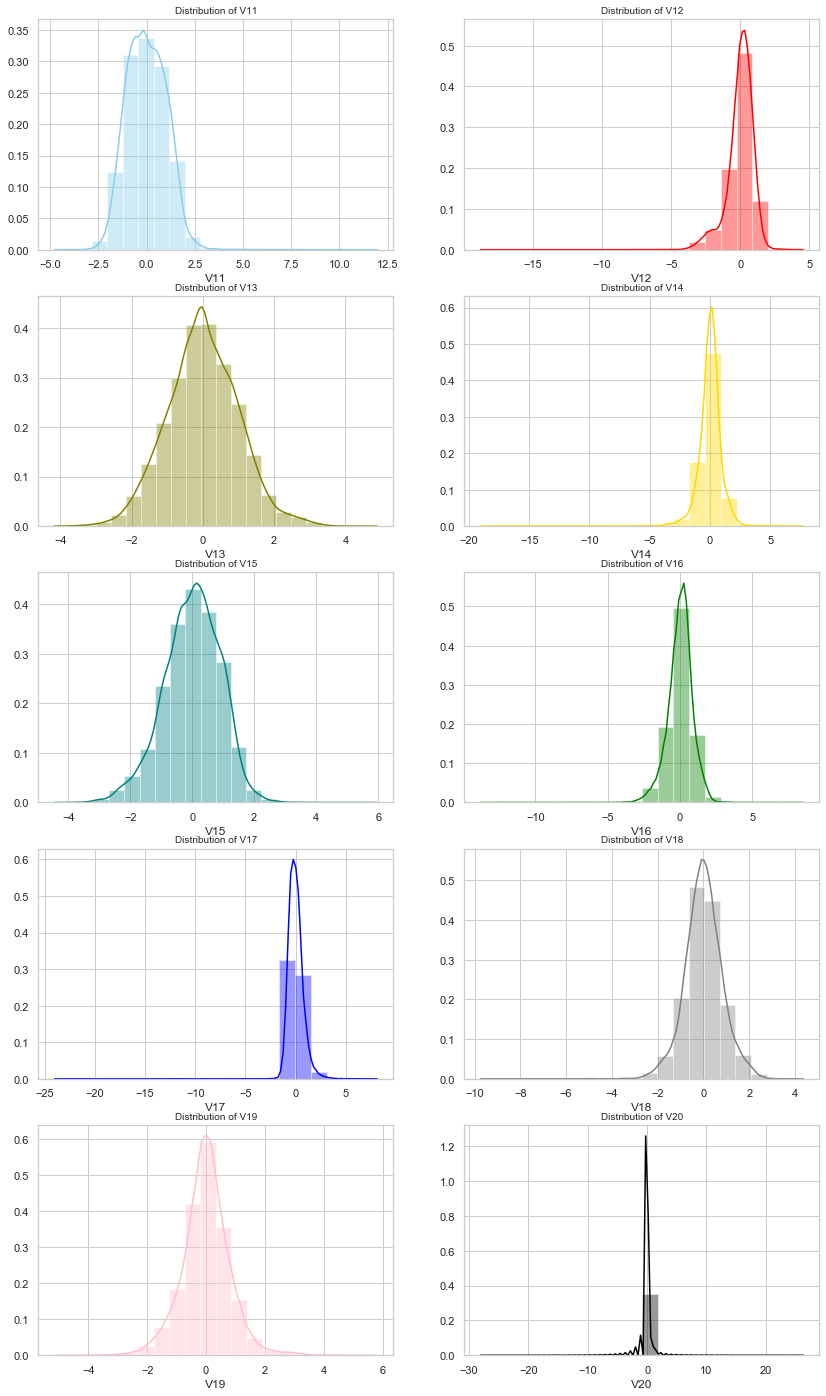

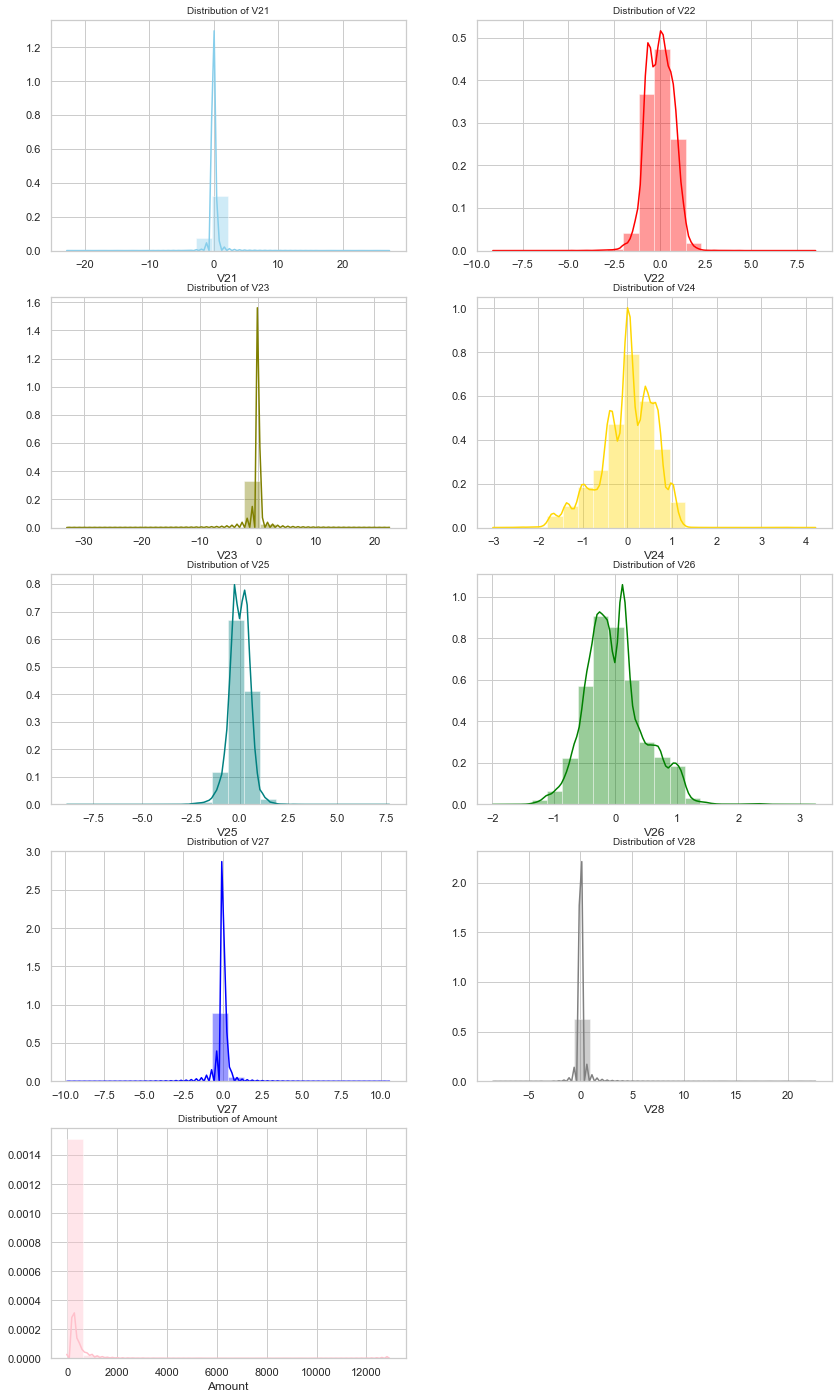

In [16]:
dist_plt(X_test,10,2,*df.columns[0:10])
dist_plt(X_test,10,2,*df.columns[10:20])
dist_plt(X_test,9,2,*df.columns[20:29])

__Observations__

We can see that there are some features whose distributions are skewed to the left, there are some features whose distributions are skewed to the right and there are some features which appears to have a normal gaussian distribution. 

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [17]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = preprocessing.PowerTransformer(method='yeo-johnson',copy=True)
X_train_pt = pt.fit_transform(X_train, y=None)
#preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)
df_trn_pt = pd.DataFrame(data=X_train_pt)
df_trn_pt.rename(columns={0:"V1", 1:"V2", 2:"V3", 3:"V4", 4:"V5", 5:"V6", 6:"V7", 7:"V8", 8:"V9", 9:"V10", 10:"V11", 11:"V12", 12:"V13", 13:"V14", 14:"V15", 15:"V16", 16:"V17", 17:"V18", 18:"V19", 19:"V20", 20:"V21", 21:"V22", 22:"V23", 23:"V24", 24:"V25", 25:"V26", 26:"V27", 27:"V28", 29:"Amount"},inplace=True)

In [18]:
X_test_pt = pt.fit_transform(X_test, y=None)
#preprocessing.PowerTransformer(method='yeo-johnson', *, standardize=True, copy=True)
df_tst_pt = pd.DataFrame(data=X_test_pt)
df_tst_pt.rename(columns={0:"V1", 1:"V2", 2:"V3", 3:"V4", 4:"V5", 5:"V6", 6:"V7", 7:"V8", 8:"V9", 9:"V10", 10:"V11", 11:"V12", 12:"V13", 13:"V14", 14:"V15", 15:"V16", 16:"V17", 17:"V18", 18:"V19", 19:"V20", 20:"V21", 21:"V22", 22:"V23", 23:"V24", 24:"V25", 25:"V26", 26:"V27", 27:"V28", 29:"Amount"},inplace=True)

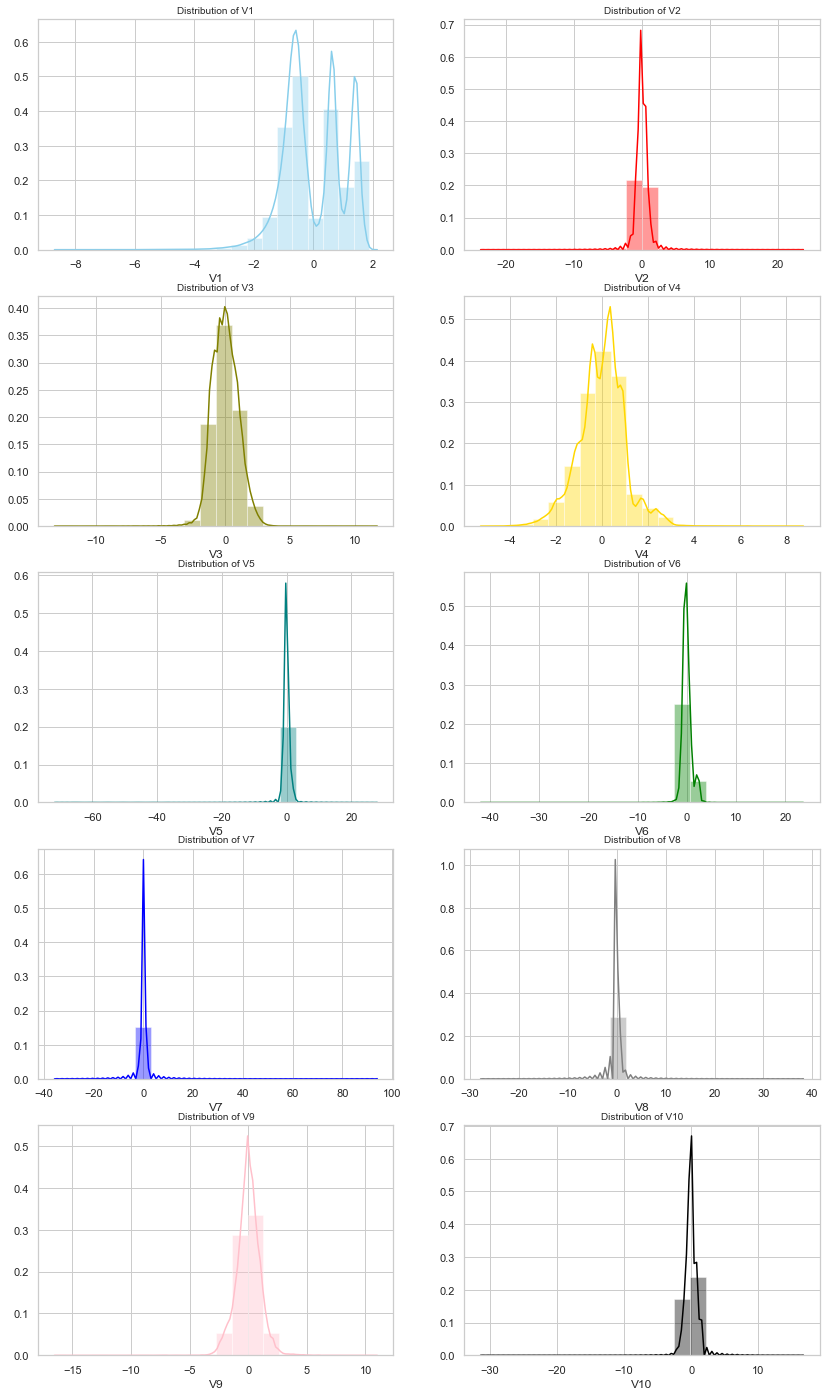

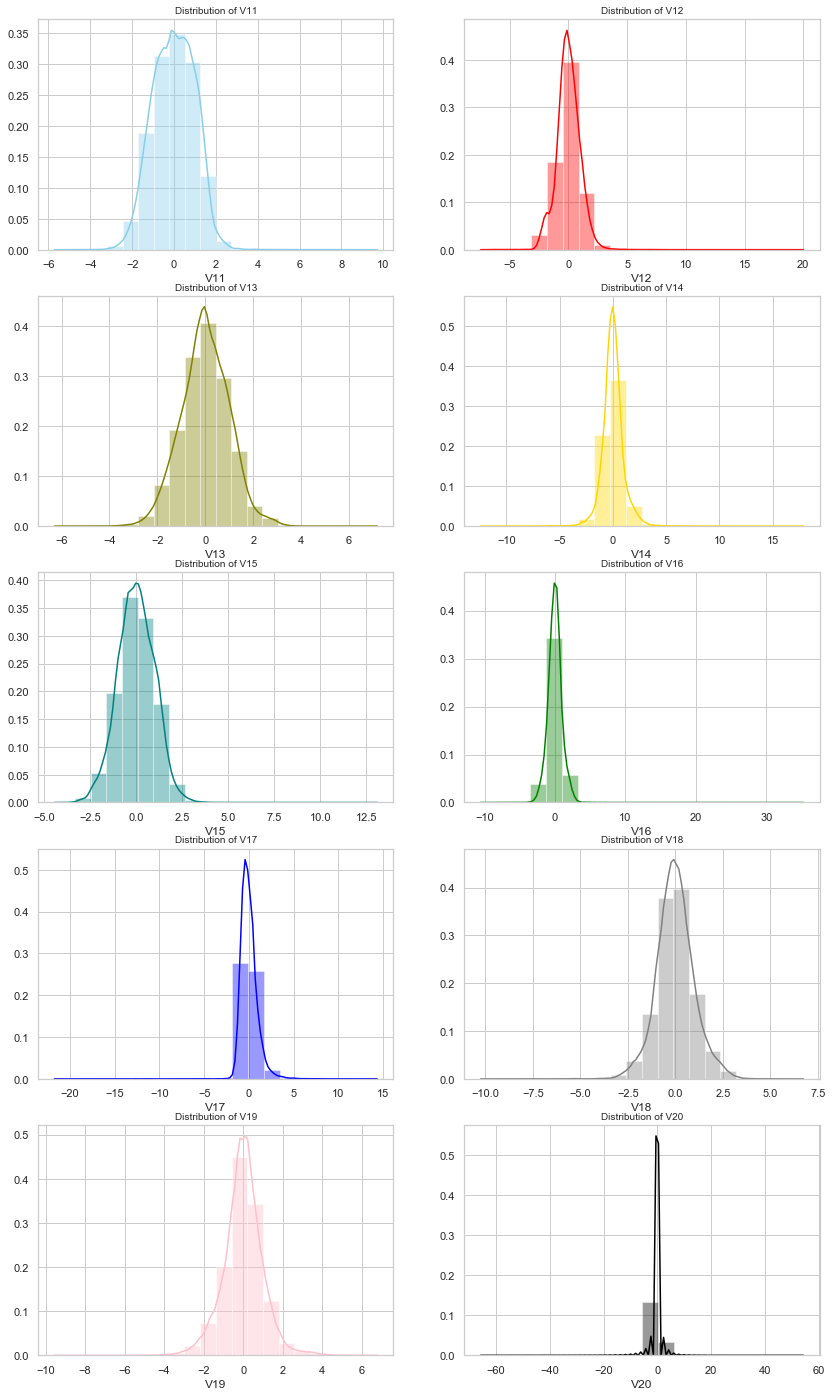

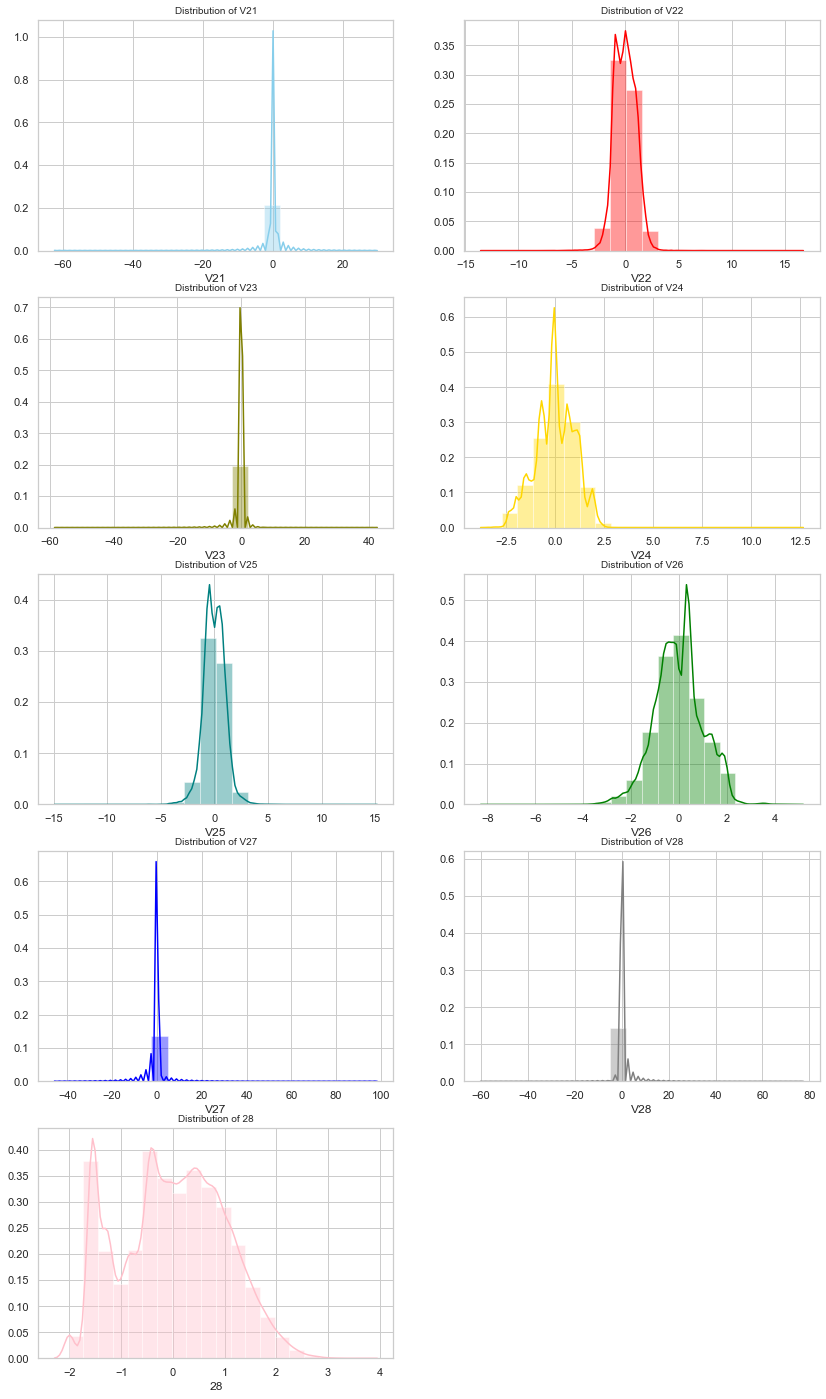

In [19]:
# plot the histogram of a variable from the dataset again to see the result 
dist_plt(df_trn_pt,10,2,*df_trn_pt.columns[0:10])
dist_plt(df_trn_pt,10,2,*df_trn_pt.columns[10:20])
dist_plt(df_trn_pt,9,2,*df_trn_pt.columns[20:29])

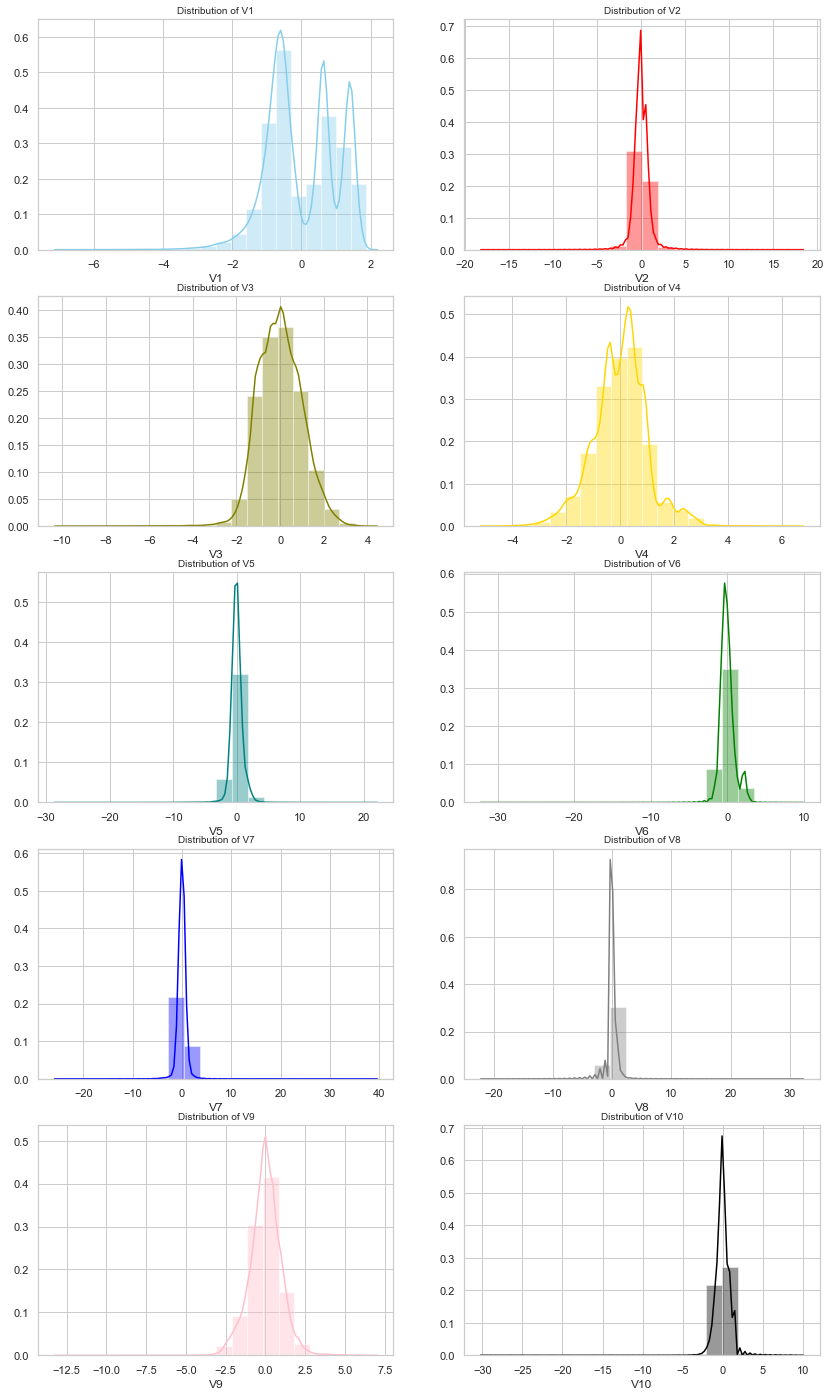

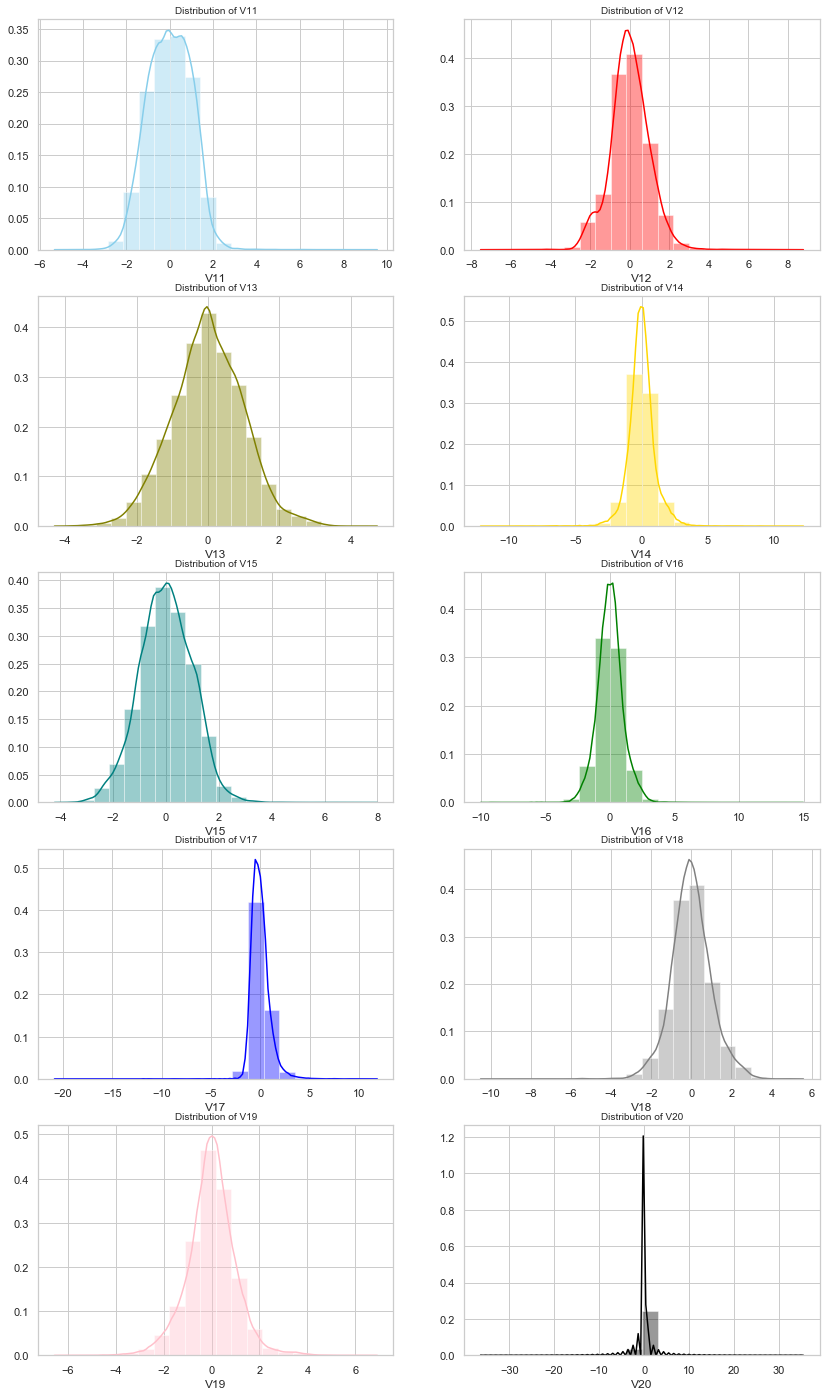

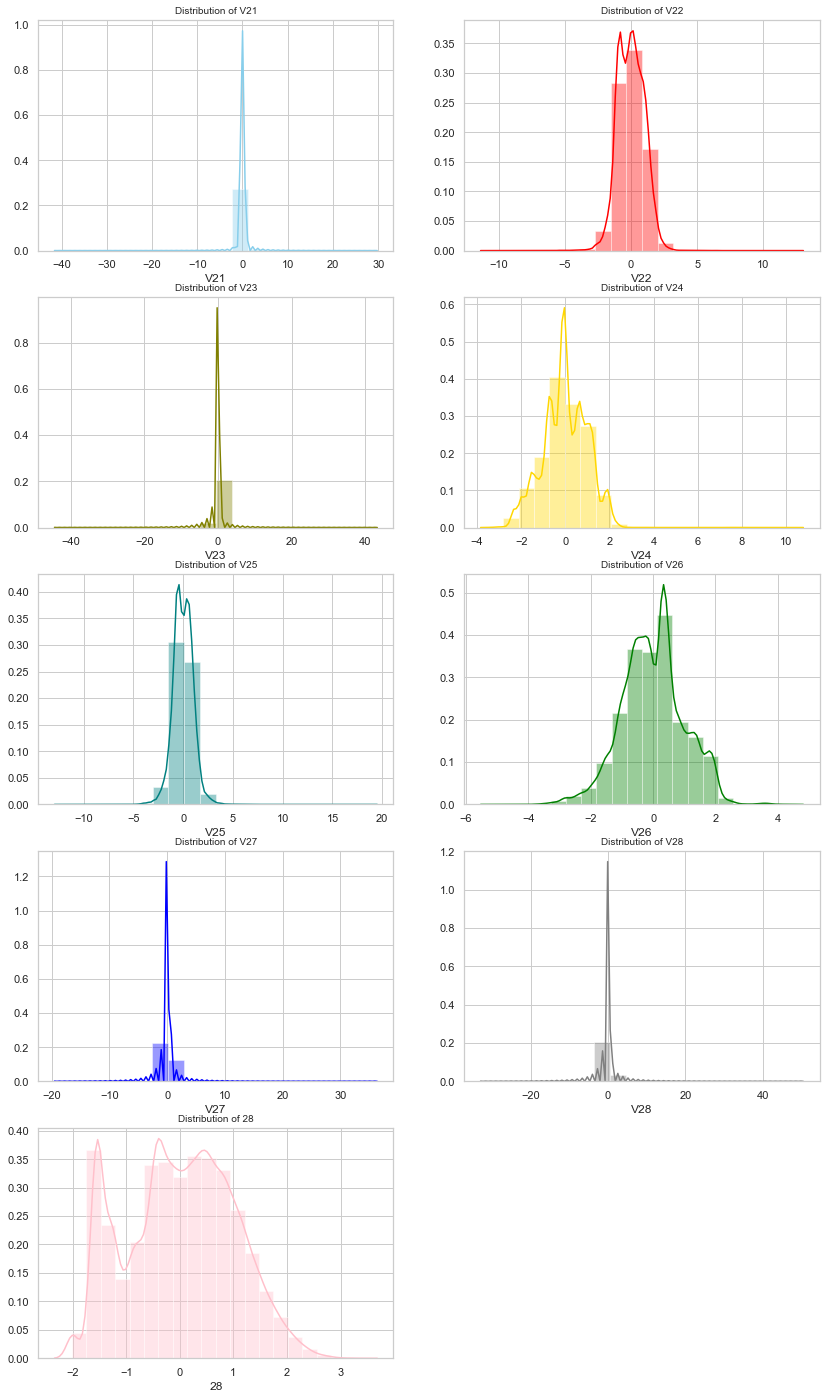

In [20]:
dist_plt(df_tst_pt,10,2,*df_tst_pt.columns[0:10])
dist_plt(df_tst_pt,10,2,*df_tst_pt.columns[10:20])
dist_plt(df_tst_pt,9,2,*df_tst_pt.columns[20:29])

__Observations__

Post transformations, the distributions are normally distributed both across training data and test data

## Model Building
- Build different models on the imbalanced dataset and see the result

#### Utilities

In [21]:
def plt_roc(actual,prob):
    fpr,tpr, thresholds = metrics.roc_curve(actual,prob,drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.figure(1,figsize=(6,6))
    plt.plot(fpr,tpr,color="red",label="ROC Curve (AUC = %0.2f)"%auc_score)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [22]:
def logr_metrics(actual,predict):
    # Confusion Matrix
    l_cm = metrics.confusion_matrix(actual,predict)
    
    # Extract TN,FP,FN,TP from confusion matrix
    tnv,fpv,fnv,tpv = l_cm.ravel()
    
    # Calculate Accuracy, Sensitivity(TPR / Recall), Specificity, FPR, Precision (PPV), NPV
    l_acc = (tnv+tpv) /(tnv+tpv+fnv+fpv)
    l_sen = (tpv) /(tpv+fnv)
    l_spec = (tnv) /(tnv+fpv)
    l_fpr = (fpv) /(tnv+fpv)
    l_prec = (tpv) /(tpv+fpv)
    l_npv = (tnv) /(tnv+fnv)
    l_f1_scr = 2*((l_prec*l_sen)/(l_prec+l_sen))
    return(l_acc,l_sen,l_spec,l_fpr,l_prec,l_npv,l_f1_scr)

### Logistic Regression

In [23]:
# Logistic Regression
from sklearn import linear_model #import the package
from sklearn.linear_model import LogisticRegression

num_C = np.logspace(-4,4,9)  #--> list of values
cv_num = StratifiedKFold(n_splits=4,random_state=42, shuffle = True) #--> list of values

In [24]:
#perform cross validation
cv = StratifiedKFold(n_splits=4,random_state=42, shuffle = True)
#cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)

#perform hyperparameter tuning
grid={"C":np.logspace(-4,4,9), "penalty":["l1","l2","elasticnet"]}

#print the evaluation result by choosing a evaluation metric
logreg=LogisticRegression(random_state=42, class_weight='balanced')
logreg_cv1=GridSearchCV(logreg,grid,cv=cv, scoring='recall', n_jobs=-1)
logreg_cv1.fit(X_train_pt,y_train)
print("Best recall: ", logreg_cv1.best_score_)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",logreg_cv1.best_params_)

Best recall:  0.9215116279069767
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


In [25]:
logreg1 = LogisticRegression(C=logreg_cv1.best_params_["C"],penalty=logreg_cv1.best_params_["penalty"],class_weight='balanced',random_state=42,  n_jobs=-1)
logreg1.fit(X_train_pt,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 97%

****F1 score is :  0.987

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99    199020
           1       0.06      0.93      0.12       344

    accuracy                           0.98    199364
   macro avg       0.53      0.95      0.55    199364
weighted avg       1.00      0.98      0.99    199364

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Train accuracy is 97%

****F1 score is :  0.986

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



(2.0, 0.0)

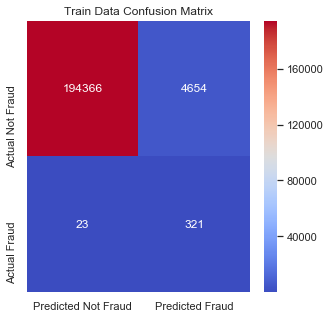

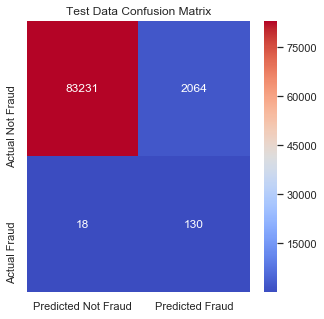

In [26]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = logreg1.predict(X_train_pt)
trn_acc = accuracy_score(y_train, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = logreg1.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### SVM

In [28]:
from sklearn.svm import SVC 

In [29]:
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True,  scoring='recall', n_jobs=-1, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train_pt, y_train) 
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)
print("Best recall: ", grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed: 324.7min finished


{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Best recall:  0.8109548167092925


In [32]:
svm1 = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svm1.fit(X_train_pt,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

###### Train Data - Prediction #####

****Train accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.85      0.81      0.83       344

    accuracy                           1.00    199364
   macro avg       0.92      0.91      0.91    199364
weighted avg       1.00      1.00      1.00    199364

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.79      0.77      0.78       148

    accuracy                           1.00     85443
   macro avg       0.89      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

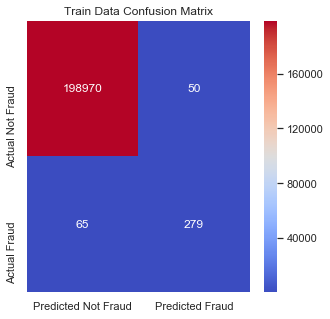

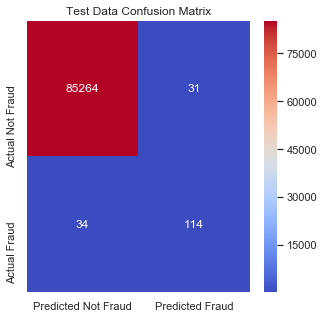

In [33]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = svm1.predict(X_train_pt)
trn_acc = accuracy_score(y_train, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = svm1.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [44]:
svm_prob = svm1.predict_proba(X_test_pt)[:,1]
svm_prob_df = pd.DataFrame({"ActualCategory":y_test,"SVM_Pred_Prob":svm_prob})
svm_prob_df.head()

,ActualCategory,SVM_Pred_Prob
186882,0,0.001313
165754,0,0.001628
235285,0,0.001691
101271,0,0.001777
5832,0,0.001593


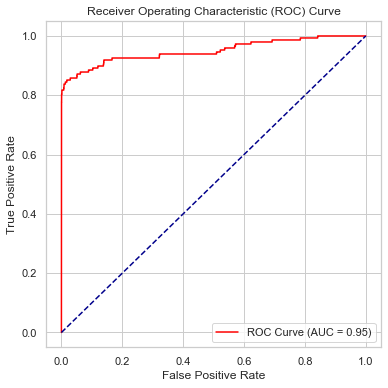

In [45]:
# plot the ROC Curve
plt_roc(svm_prob_df.ActualCategory,svm_prob_df.SVM_Pred_Prob)

In [46]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
svm_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"SVM"
    svm_prob_df[kloc] = svm_prob_df.SVM_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(svm_prob_df.ActualCategory,svm_prob_df[kloc])
    svm_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(svm_prob_df.head())
display(svm_cut_df)

,ActualCategory,SVM_Pred_Prob,0.0SVM,0.1SVM,0.2SVM,0.3SVM,0.4SVM,0.5SVM,0.6SVM,0.7SVM,0.8SVM,0.9SVM
186882,0,0.001313,1,0,0,0,0,0,0,0,0,0
165754,0,0.001628,1,0,0,0,0,0,0,0,0,0
235285,0,0.001691,1,0,0,0,0,0,0,0,0,0
101271,0,0.001777,1,0,0,0,0,0,0,0,0,0
5832,0,0.001593,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.999286,0.716216,0.999777,0.000223,0.848000,0.999508,0.776557
0.2,0.2,0.999075,0.513514,0.999918,0.000082,0.915663,0.999157,0.658009
0.3,0.3,0.998759,0.317568,0.999941,0.000059,0.903846,0.998817,0.470000
0.4,0.4,0.998713,0.290541,0.999941,0.000059,0.895833,0.998770,0.438776
0.5,0.5,0.998642,0.243243,0.999953,0.000047,0.900000,0.998689,0.382979
0.6,0.6,0.998607,0.202703,0.999988,0.000012,0.967742,0.998618,0.335196
0.7,0.7,0.998408,0.081081,1.000000,0.000000,1.000000,0.998408,0.150000
0.8,0.8,0.998268,0.000000,1.000000,0.000000,NaN,0.998268,NaN
0.9,0.9,0.998268,0.000000,1.000000,0.000000,NaN,0.998268,NaN


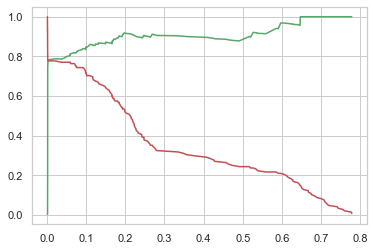

In [47]:
p, r, thresholds = metrics.precision_recall_curve(svm_prob_df.ActualCategory,svm_prob_df.SVM_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [61]:
svm_prob_cut = 0.03
svm_prob_df["SVM_Final_Pred"] = svm_prob_df.SVM_Pred_Prob.map(lambda x: 1 if x > svm_prob_cut else 0)
svm_prob_df.head()

,ActualCategory,SVM_Pred_Prob,0.0SVM,0.1SVM,0.2SVM,0.3SVM,0.4SVM,0.5SVM,0.6SVM,0.7SVM,0.8SVM,0.9SVM,SVM_Final_Pred
186882,0,0.001313,1,0,0,0,0,0,0,0,0,0,0
165754,0,0.001628,1,0,0,0,0,0,0,0,0,0,0
235285,0,0.001691,1,0,0,0,0,0,0,0,0,0,0
101271,0,0.001777,1,0,0,0,0,0,0,0,0,0,0
5832,0,0.001593,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9992392589211521,

Sensitivity = 0.7702702702702703,

Specificity = 0.9996365554839088,

FPR = 0.00036344451609121283,

Precision = 0.7862068965517242,

NPV = 0.9996013974536332,

F1 Score = 0.7781569965870307


(2.0, 0.0)

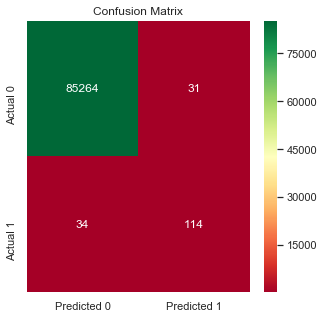

In [62]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(svm_prob_df.ActualCategory,svm_prob_df["SVM_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(svm_prob_df.ActualCategory,svm_prob_df["SVM_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,random_state=rndm_stat)
# list of hyper params to tune
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4,5,10],'class_weight': ['balanced'],"n_jobs":[-1]}

# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)

rf_cv = GridSearchCV(estimator = rf, 
                        cv = folds,
                        param_grid = params, 
                        return_train_score=True,
                        scoring='recall',
                        verbose = 1,
                        n_jobs=-1)            
rf_cv.fit(X_train_pt, y_train)
# print best parameter after tuning 
print(rf_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(rf_cv.best_estimator_)

print("Best recall: ", rf_cv.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 13.2min finished


{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 10, 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best recall:  0.7732558139534884


In [91]:
ranfor1 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
ranfor1.fit(X_train_pt,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 100%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00       344

    accuracy                           1.00    199364
   macro avg       1.00      1.00      1.00    199364
weighted avg       1.00      1.00      1.00    199364

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.99      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

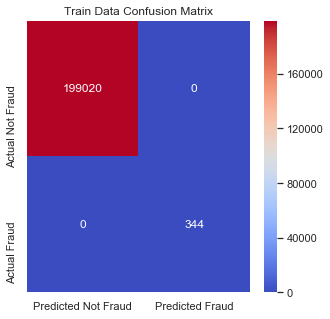

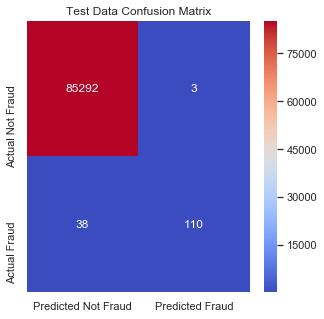

In [92]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = ranfor1.predict(X_train_pt)
trn_acc = accuracy_score(y_train, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = ranfor1.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [102]:
rf_prob = ranfor1.predict_proba(X_test_pt)[:,1]
rf_prob_df = pd.DataFrame({"ActualCategory":y_test,"RF_Pred_Prob":rf_prob})
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob
186882,0,0.0
165754,0,0.0
235285,0,0.0
101271,0,0.0
5832,0,0.0


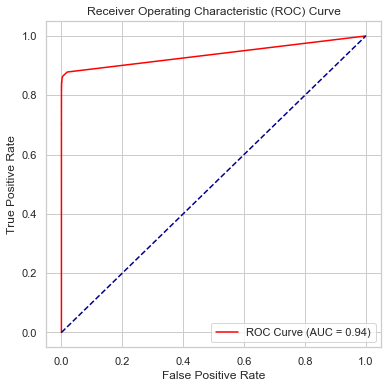

In [103]:
# plot the ROC Curve
plt_roc(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)

In [104]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
rf_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"RF"
    rf_prob_df[kloc] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df[kloc])
    rf_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(rf_prob_df.head())
display(rf_cut_df)

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF
186882,0,0.0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.980642,0.878378,0.980820,0.019180,0.073613,0.999785,0.135841
0.1,0.1,0.999181,0.837838,0.999461,0.000539,0.729412,0.999719,0.779874
0.2,0.2,0.999544,0.824324,0.999848,0.000152,0.903704,0.999695,0.862191
0.3,0.3,0.999532,0.777027,0.999918,0.000082,0.942623,0.999613,0.851852
0.4,0.4,0.999485,0.743243,0.999930,0.000070,0.948276,0.999555,0.833333
0.5,0.5,0.999520,0.743243,0.999965,0.000035,0.973451,0.999555,0.842912
0.6,0.6,0.999462,0.702703,0.999977,0.000023,0.981132,0.999484,0.818898
0.7,0.7,0.999403,0.668919,0.999977,0.000023,0.980198,0.999426,0.795181
0.8,0.8,0.999263,0.587838,0.999977,0.000023,0.977528,0.999285,0.734177
0.9,0.9,0.999005,0.432432,0.999988,0.000012,0.984615,0.999016,0.600939


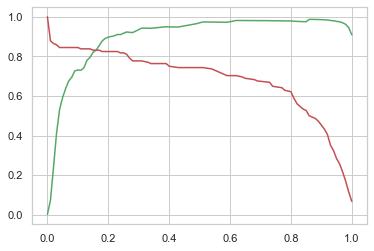

In [105]:
p, r, thresholds = metrics.precision_recall_curve(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [128]:
rf_prob_cut = 0.009
rf_prob_df["RF_Final_Pred"] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > rf_prob_cut else 0)
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF,RF_Final_Pred
186882,0,0.0,0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9806420654705477,

Sensitivity = 0.8783783783783784,

Specificity = 0.9808195087637025,

FPR = 0.019180491236297555,

Precision = 0.07361268403171008,

NPV = 0.9997848871254945,

F1 Score = 0.13584117032392895


(2.0, 0.0)

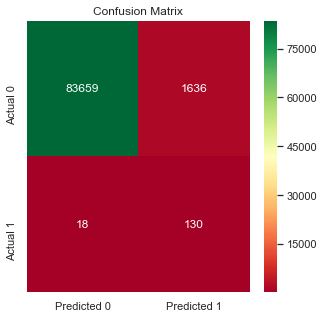

In [129]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### XGBOOST

In [25]:
from xgboost import XGBClassifier

In [31]:
alg = XGBClassifier(objective='binary:logistic')
# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)
clf = GridSearchCV(alg,{'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                    verbose=1, 
                    cv = folds,
                    scoring='recall')

clf.fit(X_train_pt, y_train)
clf.best_score_, clf.best_params_


Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 10.6min finished


(0.813953488372093, {'max_depth': 4, 'n_estimators': 100})

In [301]:
print(clf.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [64]:
xgboost1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgboost1.fit(X_train_pt,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###### Train Data - Prediction #####

****Train accuracy is 99%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.99      0.86      0.92       344

    accuracy                           1.00    199364
   macro avg       0.99      0.93      0.96    199364
weighted avg       1.00      1.00      1.00    199364

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.74      0.82       148

    accuracy                           1.00     85443
   macro avg       0.96      0.87      0.91     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

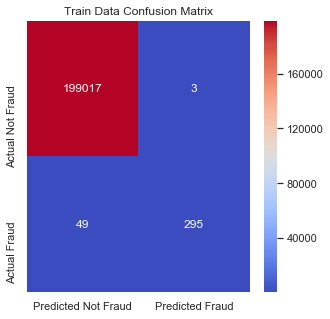

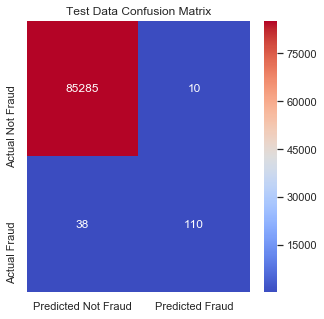

In [65]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = xgboost1.predict(X_train_pt)
trn_acc = accuracy_score(y_train, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = xgboost1.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [66]:
xg_prob = xgboost1.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob
186882,0,0.000090
165754,0,0.000046
235285,0,0.000409
101271,0,0.000075
5832,0,0.000052


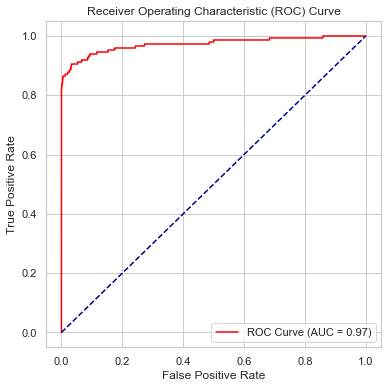

In [67]:
# plot the ROC Curve
plt_roc(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)

In [69]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(xg_prob_df.head())
display(xg_cut_df)

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG
186882,0,0.000090,1,0,0,0,0,0,0,0,0,0
165754,0,0.000046,1,0,0,0,0,0,0,0,0,0
235285,0,0.000409,1,0,0,0,0,0,0,0,0,0
101271,0,0.000075,1,0,0,0,0,0,0,0,0,0
5832,0,0.000052,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.999192,0.824324,0.999496,0.000504,0.739394,0.999695,0.779553
0.2,0.2,0.999380,0.810811,0.999707,0.000293,0.827586,0.999672,0.819113
0.3,0.3,0.999427,0.797297,0.999777,0.000223,0.861314,0.999648,0.828070
0.4,0.4,0.999438,0.770270,0.999836,0.000164,0.890625,0.999601,0.826087
0.5,0.5,0.999438,0.743243,0.999883,0.000117,0.916667,0.999555,0.820896
0.6,0.6,0.999427,0.716216,0.999918,0.000082,0.938053,0.999508,0.812261
0.7,0.7,0.999391,0.695946,0.999918,0.000082,0.936364,0.999473,0.798450
0.8,0.8,0.999345,0.648649,0.999953,0.000047,0.960000,0.999391,0.774194
0.9,0.9,0.999251,0.574324,0.999988,0.000012,0.988372,0.999262,0.726496


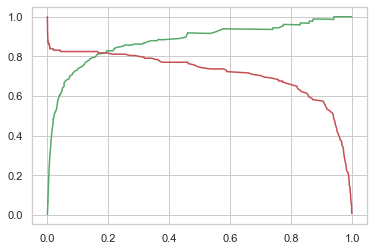

In [70]:
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [149]:
xg_prob_cut = 0.001
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG,RF_Final_Pred,XG_Final_Pred
186882,0,0.000090,1,0,0,0,0,0,0,0,0,0,0,0
165754,0,0.000046,1,0,0,0,0,0,0,0,0,0,0,0
235285,0,0.000409,1,0,0,0,0,0,0,0,0,0,0,0
101271,0,0.000075,1,0,0,0,0,0,0,0,0,0,0,0
5832,0,0.000052,1,0,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9638706506091781,

Sensitivity = 0.9054054054054054,

Specificity = 0.9639720968403775,

FPR = 0.03602790315962249,

Precision = 0.04178359837854693,

NPV = 0.9998297582567246,

F1 Score = 0.07988077496274218


(2.0, 0.0)

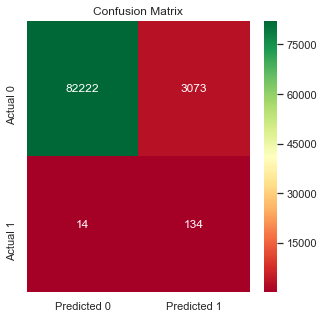

In [150]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Final Choice - Proceed with the model which shows the best result  - XGBoost
- Apply the best hyperparameter on the model
- Predict on the test dataset

In [157]:
clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
clf.fit(X_train_pt,y_train)

xg_prob = clf.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})

# Predictions at different cutoff values
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

xg_prob_cut = 0.001
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)

# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
#print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))
print("Best Score of Recall on Test Data is - ", round(sen,3)*100, "%")

Best Score of Recall on Test Data is -  90.5 %


(2.0, 0.0)

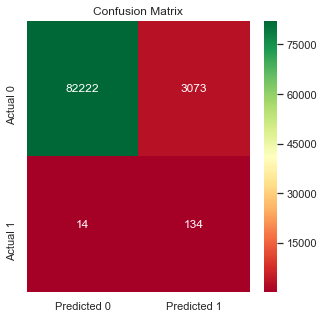

In [158]:
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


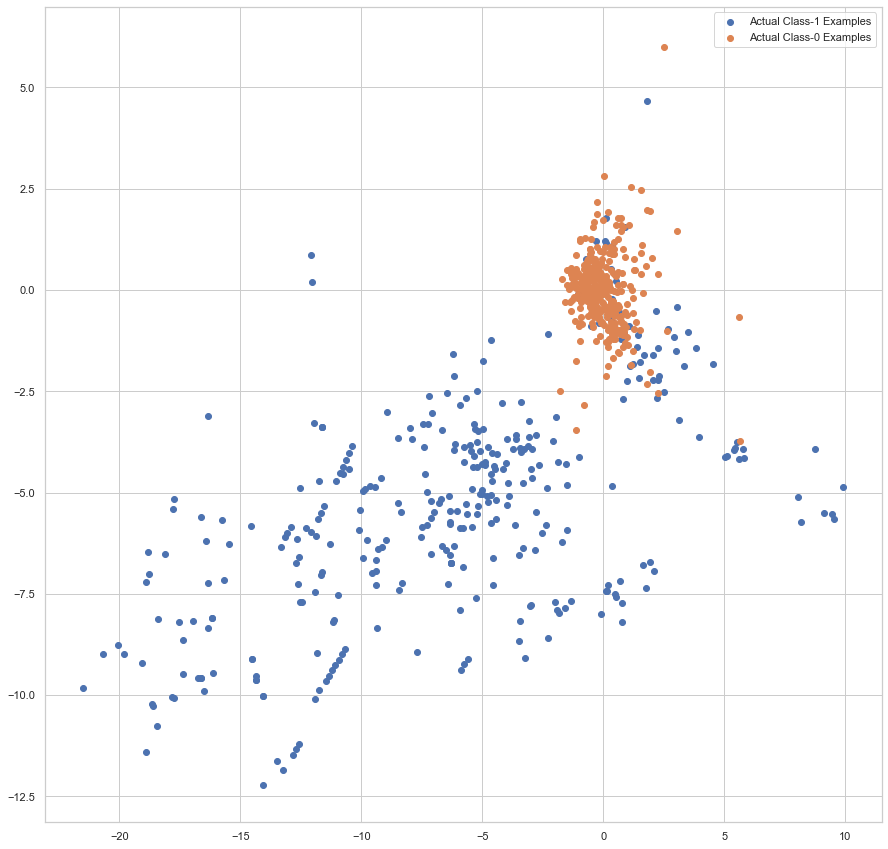

In [161]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-14 and Index-10 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train_pt[np.where(y_train==1.0)]
X_train_0 = X_train_pt[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 15]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

#Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

In [23]:
from imblearn import over_sampling #- import the packages
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE,ADASYN

Using TensorFlow backend.


### Random Oversampling

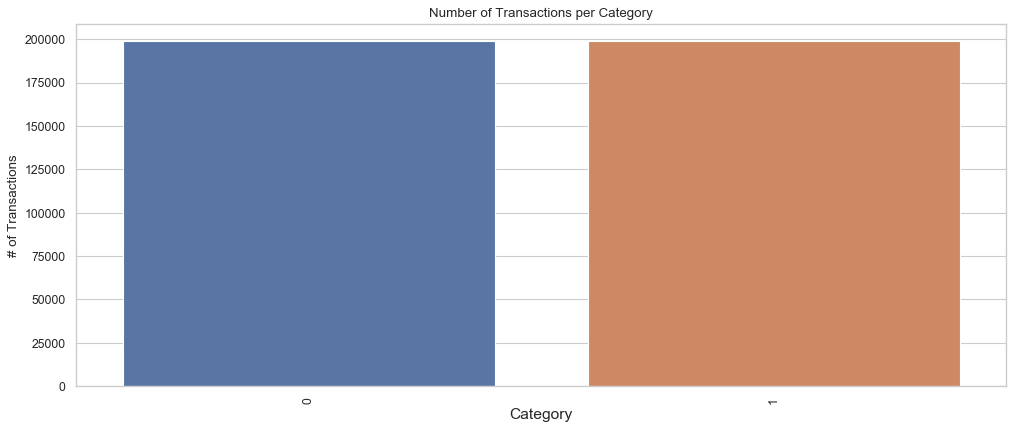

In [24]:
## RandomOverSampler on Power-Transformed Data
ros = RandomOverSampler(random_state = 0) 
X_train_ros, y_train_ros = ros.fit_sample(X_train_pt,y_train)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x= y_train_ros)
plt.title("Number of Transactions per Category")
plt.ylabel('# of Transactions', fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

#### Model Building
- Build different models on the balanced dataset and see the result

#### Logistic Regression

In [145]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-4,4,9)  #--> list of values
cv_num = StratifiedKFold(n_splits=4,random_state=42, shuffle = True) #--> list of values

In [166]:
#perform cross validation
cv = StratifiedKFold(n_splits=4,random_state=42, shuffle = True)

#perform hyperparameter tuning
grid={"C":np.logspace(-4,4,9), "penalty":["l1","l2","elasticnet"]}

#print the evaluation result by choosing a evaluation metric
logreg2=LogisticRegression(random_state=42, class_weight='balanced')
logreg_cv2=GridSearchCV(logreg2,grid,cv=cv, scoring='recall', n_jobs=-1)
logreg_cv2.fit(X_train_ros, y_train_ros)
print("Best recall: ", logreg_cv2.best_score_)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",logreg_cv2.best_params_)
# print how our model looks after hyper-parameter tuning 
print(logreg_cv2.best_estimator_)

Best recall:  0.9325344186513919
tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [167]:
logreg2 = LogisticRegression(C=logreg_cv2.best_params_["C"],penalty=logreg_cv2.best_params_["penalty"],random_state=42,  n_jobs=-1)
logreg2.fit(X_train_ros, y_train_ros)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 95%

****F1 score is :  0.955

 classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.98      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.96      0.95      0.95    398040
weighted avg       0.96      0.95      0.95    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Train accuracy is 97%

****F1 score is :  0.986

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443



(2.0, 0.0)

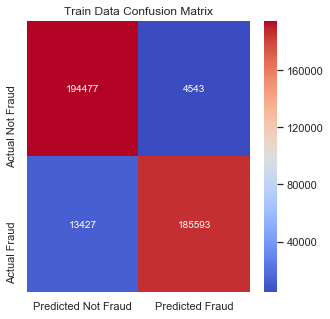

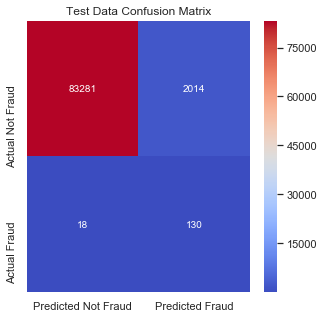

In [168]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = logreg2.predict(X_train_ros)
trn_acc = accuracy_score(y_train_ros, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_ros, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_ros, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_ros, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = logreg2.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,random_state=rndm_stat)

# list of hyper params to tune
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4,5,10],'class_weight': ['balanced'],"n_jobs":[-1]}

# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)

rf_cv1 = GridSearchCV(estimator = rf, 
                        cv = folds,
                        param_grid = params, 
                        return_train_score=True,
                        scoring='recall',
                        verbose = 1,
                        n_jobs=-1)            
rf_cv1.fit(X_train_ros, y_train_ros)
# print best parameter after tuning 
print(rf_cv1.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(rf_cv1.best_estimator_)

print("Best recall: ", rf_cv1.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 30.3min finished


{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best recall:  1.0


In [170]:
ranfor2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
ranfor2.fit(X_train_ros, y_train_ros)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 100%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.97      0.73      0.83       148

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.92     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

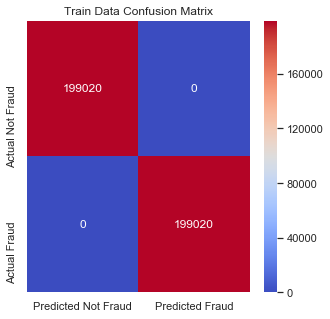

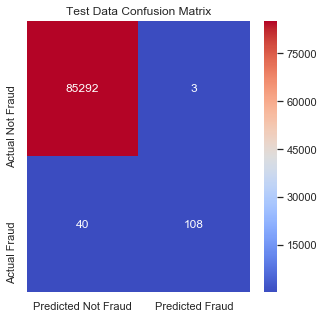

In [171]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = ranfor2.predict(X_train_ros)
trn_acc = accuracy_score(y_train_ros, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_ros, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_ros, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_ros, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = ranfor2.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [172]:
rf_prob = ranfor2.predict_proba(X_test_pt)[:,1]
rf_prob_df = pd.DataFrame({"ActualCategory":y_test,"RF_Pred_Prob":rf_prob})
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob
186882,0,0.0
165754,0,0.0
235285,0,0.0
101271,0,0.0
5832,0,0.0


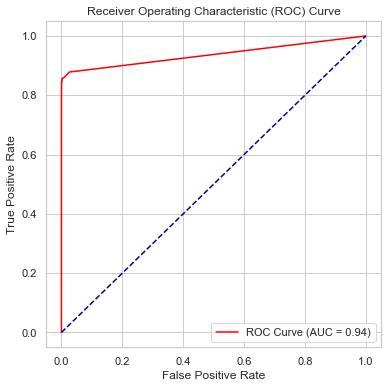

In [173]:
# plot the ROC Curve
plt_roc(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)

In [174]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
rf_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"RF"
    rf_prob_df[kloc] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df[kloc])
    rf_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(rf_prob_df.head())
display(rf_cut_df)

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF
186882,0,0.0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.973585,0.878378,0.973750,0.026250,0.054875,0.999783,0.103298
0.1,0.1,0.999064,0.844595,0.999332,0.000668,0.686813,0.999730,0.757576
0.2,0.2,0.999321,0.817568,0.999637,0.000363,0.796053,0.999683,0.806667
0.3,0.3,0.999473,0.797297,0.999824,0.000176,0.887218,0.999648,0.839858
0.4,0.4,0.999508,0.763514,0.999918,0.000082,0.941667,0.999590,0.843284
0.5,0.5,0.999497,0.729730,0.999965,0.000035,0.972973,0.999531,0.833977
0.6,0.6,0.999473,0.716216,0.999965,0.000035,0.972477,0.999508,0.824903
0.7,0.7,0.999391,0.668919,0.999965,0.000035,0.970588,0.999426,0.792000
0.8,0.8,0.999239,0.567568,0.999988,0.000012,0.988235,0.999250,0.721030
0.9,0.9,0.998947,0.398649,0.999988,0.000012,0.983333,0.998958,0.567308


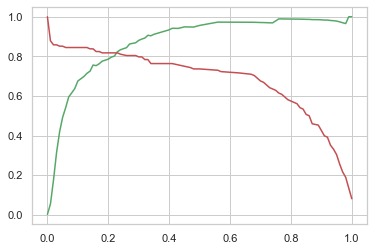

In [175]:
p, r, thresholds = metrics.precision_recall_curve(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [210]:
rf_prob_cut = 0.009
rf_prob_df["RF_Final_Pred"] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > rf_prob_cut else 0)
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF,RF_Final_Pred
186882,0,0.0,0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9735847290006203,

Sensitivity = 0.8783783783783784,

Specificity = 0.9737499267248959,

FPR = 0.02625007327510405,

Precision = 0.054875474883917266,

NPV = 0.9997833257096083,

F1 Score = 0.10329757647993643


(2.0, 0.0)

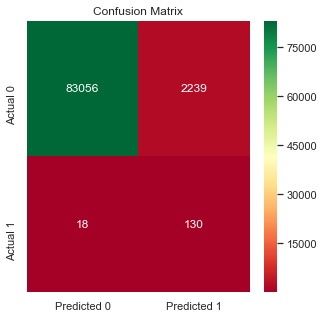

In [211]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### XGBOOST

In [172]:
alg = XGBClassifier(objective='binary:logistic')
# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)
clf2 = GridSearchCV(alg,{'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                    verbose=1, 
                    cv = folds,
                    scoring='recall')

clf2.fit(X_train_ros, y_train_ros)
print(clf2.best_score_, clf2.best_params_)
print(clf2.best_estimator_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 17.6min finished


1.0 {'max_depth': 2, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [26]:
xgboost2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgboost2.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###### Train Data - Prediction #####

****Train accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.997

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.30      0.85      0.45       148

    accuracy                           1.00     85443
   macro avg       0.65      0.92      0.72     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

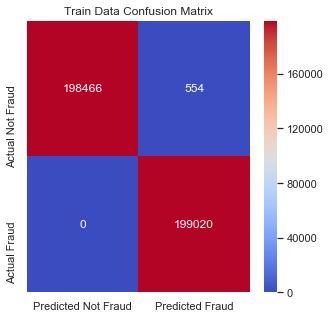

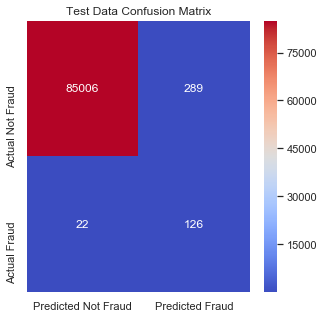

In [27]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = xgboost2.predict(X_train_ros)
trn_acc = accuracy_score(y_train_ros, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_ros, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_ros, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_ros, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = xgboost2.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [28]:
xg_prob = xgboost2.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob
186882,0,0.000032
165754,0,0.002517
235285,0,0.128598
101271,0,0.004946
5832,0,0.004402


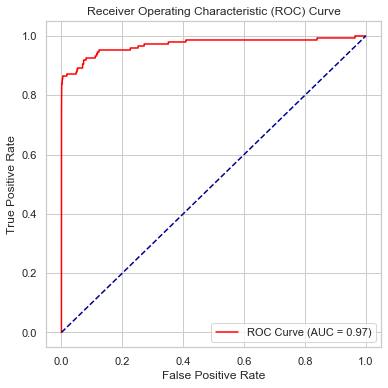

In [29]:
# plot the ROC Curve
plt_roc(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)

In [30]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(xg_prob_df.head())
display(xg_cut_df)

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG
186882,0,0.000032,1,0,0,0,0,0,0,0,0,0
165754,0,0.002517,1,0,0,0,0,0,0,0,0,0
235285,0,0.128598,1,1,0,0,0,0,0,0,0,0
101271,0,0.004946,1,0,0,0,0,0,0,0,0,0
5832,0,0.004402,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.974463,0.871622,0.974641,0.025359,0.056283,0.999772,0.105738
0.2,0.2,0.987571,0.864865,0.987784,0.012216,0.109402,0.999763,0.194234
0.3,0.3,0.992685,0.864865,0.992907,0.007093,0.174625,0.999764,0.290579
0.4,0.4,0.995295,0.864865,0.995521,0.004479,0.250980,0.999765,0.389058
0.5,0.5,0.996360,0.851351,0.996612,0.003388,0.303614,0.999741,0.447602
0.6,0.6,0.997320,0.844595,0.997585,0.002415,0.377644,0.999730,0.521921
0.7,0.7,0.997975,0.837838,0.998253,0.001747,0.454212,0.999718,0.589074
0.8,0.8,0.998572,0.837838,0.998851,0.001149,0.558559,0.999718,0.670270
0.9,0.9,0.999052,0.810811,0.999379,0.000621,0.693642,0.999672,0.747664


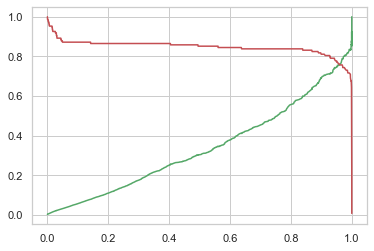

In [31]:
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [52]:
xg_prob_cut = 0.031
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG,XG_Final_Pred
186882,0,0.000032,1,0,0,0,0,0,0,0,0,0,0
165754,0,0.002517,1,0,0,0,0,0,0,0,0,0,0
235285,0,0.128598,1,1,0,0,0,0,0,0,0,0,1
101271,0,0.004946,1,0,0,0,0,0,0,0,0,0,0
5832,0,0.004402,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9302458949241015,

Sensitivity = 0.9054054054054054,

Specificity = 0.9302889970103757,

FPR = 0.06971100298962425,

Precision = 0.022039473684210525,

NPV = 0.9998235953781989,

F1 Score = 0.04303147077713551


(2.0, 0.0)

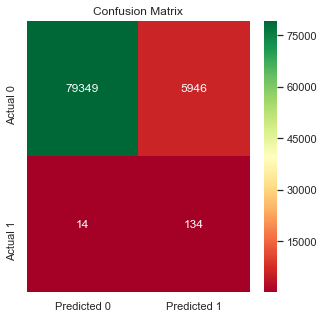

In [53]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### SMOTE

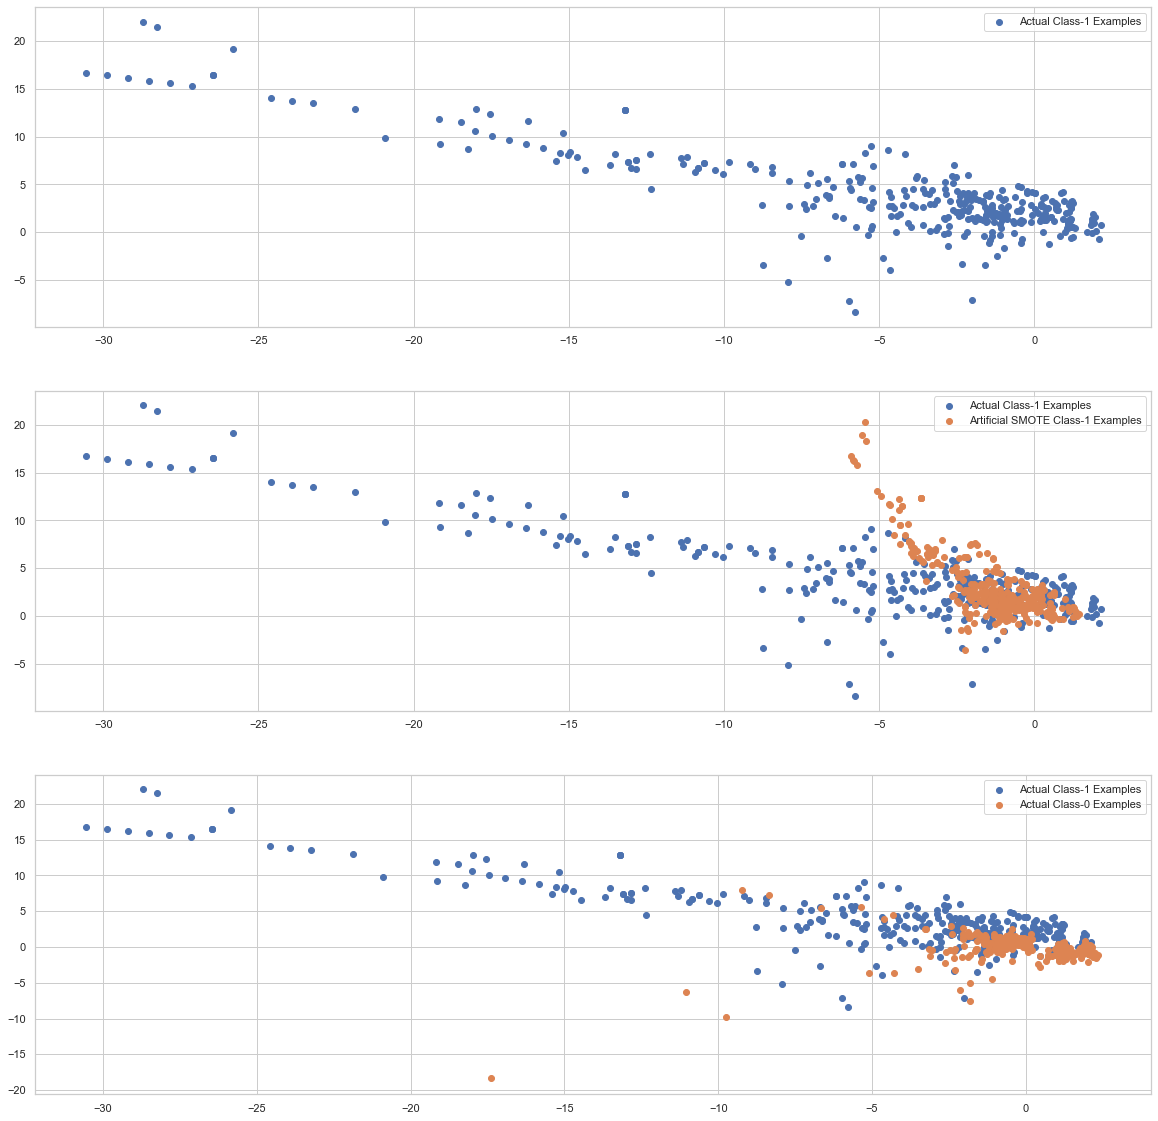

In [26]:
import warnings
warnings.filterwarnings("ignore")


sm = over_sampling.SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train_pt,y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1[:X_train_1.shape[0], 0], X_train_smote_1[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Print the class distribution after applying SMOTE 

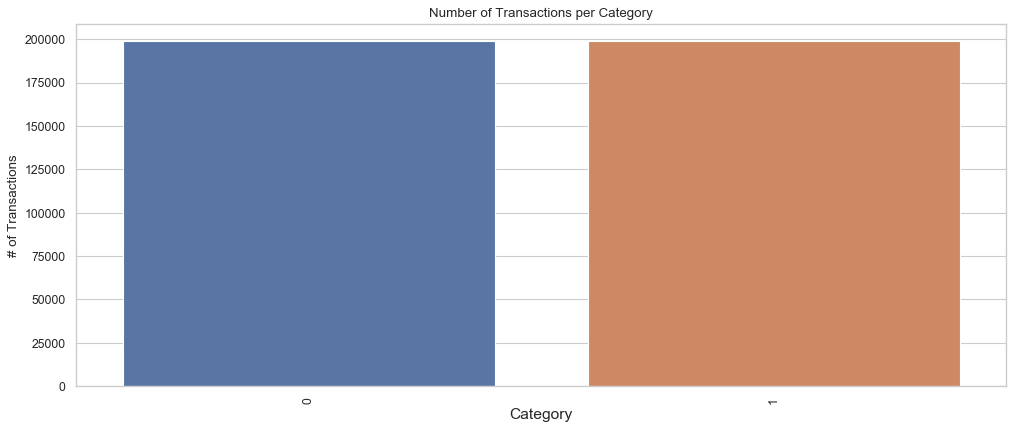

In [54]:
## SMOTE on Power-Transformed Data
sm = SMOTE(random_state = 0) 
X_train_smote, y_train_smote = sm.fit_sample(X_train_pt,y_train)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x= y_train_smote)
plt.title("Number of Transactions per Category")
plt.ylabel('# of Transactions', fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

#### Model Building
- Build different models on the balanced dataset and see the result

#### Logistic Regression

In [198]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-4,4,9)  #--> list of values
cv_num = StratifiedKFold(n_splits=4,random_state=42, shuffle = True) #--> list of values

In [146]:
#perform cross validation
cv = StratifiedKFold(n_splits=4,random_state=42, shuffle = True)

#perform hyperparameter tuning
grid={"C":np.logspace(-4,4,9), "penalty":["l1","l2","elasticnet"]}

#print the evaluation result by choosing a evaluation metric
logreg3=LogisticRegression(random_state=42, class_weight='balanced')
logreg_cv3=GridSearchCV(logreg3,grid,cv=cv, scoring='recall', n_jobs=-1)
logreg_cv3.fit(X_train_smote, y_train_smote)
print("Best recall: ", logreg_cv3.best_score_)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",logreg_cv3.best_params_)
# print how our model looks after hyper-parameter tuning 
print(logreg_cv3.best_estimator_)

Best recall:  0.940066324992463
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [147]:
logreg3 = LogisticRegression(C=logreg_cv3.best_params_["C"],penalty=logreg_cv3.best_params_["penalty"],random_state=42,  n_jobs=-1)
logreg3.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 95%

****F1 score is :  0.958

 classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96    199020
           1       0.97      0.94      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Train accuracy is 97%

****F1 score is :  0.985

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.88      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443



(2.0, 0.0)

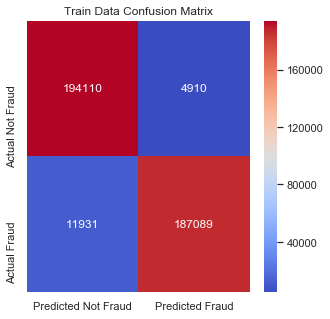

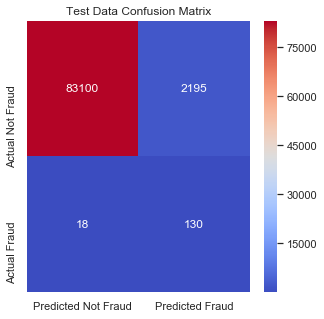

In [148]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = logreg3.predict(X_train_smote)
trn_acc = accuracy_score(y_train_smote, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_smote, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_smote, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_smote, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = logreg3.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [149]:
lr_prob = logreg3.predict_proba(X_test_pt)[:,1]
lr_prob_df = pd.DataFrame({"ActualCategory":y_test,"LR_Pred_Prob":lr_prob})
lr_prob_df.head()

,ActualCategory,LR_Pred_Prob
186882,0,0.000859
165754,0,0.082049
235285,0,0.102929
101271,0,0.029167
5832,0,0.054338


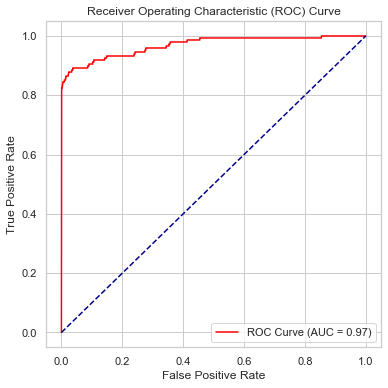

In [150]:
# plot the ROC Curve
plt_roc(lr_prob_df.ActualCategory,lr_prob_df.LR_Pred_Prob)

In [151]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
lr_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"LR"
    lr_prob_df[kloc] = lr_prob_df.LR_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(lr_prob_df.ActualCategory,lr_prob_df[kloc])
    lr_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(lr_prob_df.head())
display(lr_cut_df)

,ActualCategory,LR_Pred_Prob,0.0LR,0.1LR,0.2LR,0.3LR,0.4LR,0.5LR,0.6LR,0.7LR,0.8LR,0.9LR
186882,0,0.000859,1,0,0,0,0,0,0,0,0,0
165754,0,0.082049,1,0,0,0,0,0,0,0,0,0
235285,0,0.102929,1,1,0,0,0,0,0,0,0,0
101271,0,0.029167,1,0,0,0,0,0,0,0,0,0
5832,0,0.054338,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.837904,0.932432,0.837740,0.162260,0.009873,0.999860,0.019538
0.2,0.2,0.918179,0.891892,0.918225,0.081775,0.018573,0.999796,0.036389
0.3,0.3,0.949264,0.891892,0.949364,0.050636,0.029656,0.999802,0.057404
0.4,0.4,0.964491,0.885135,0.964629,0.035371,0.041614,0.999793,0.079490
0.5,0.5,0.974100,0.878378,0.974266,0.025734,0.055914,0.999783,0.105135
0.6,0.6,0.981145,0.864865,0.981347,0.018653,0.074462,0.999761,0.137118
0.7,0.7,0.987196,0.851351,0.987432,0.012568,0.105175,0.999739,0.187221
0.8,0.8,0.991398,0.844595,0.991653,0.008347,0.149343,0.999728,0.253807
0.9,0.9,0.995178,0.844595,0.995439,0.004561,0.243191,0.999729,0.377644


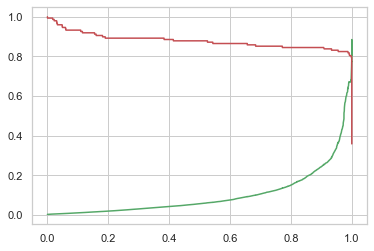

In [153]:
p, r, thresholds = metrics.precision_recall_curve(lr_prob_df.ActualCategory,lr_prob_df.LR_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [168]:
lr_prob_cut = 0.38
lr_prob_df["LR_Final_Pred"] = lr_prob_df.LR_Pred_Prob.map(lambda x: 1 if x > lr_prob_cut else 0)
lr_prob_df.head()

,ActualCategory,LR_Pred_Prob,0.0LR,0.1LR,0.2LR,0.3LR,0.4LR,0.5LR,0.6LR,0.7LR,0.8LR,0.9LR,LR_Final_Pred
186882,0,0.000859,1,0,0,0,0,0,0,0,0,0,0
165754,0,0.082049,1,0,0,0,0,0,0,0,0,0,0
235285,0,0.102929,1,1,0,0,0,0,0,0,0,0,0
101271,0,0.029167,1,0,0,0,0,0,0,0,0,0,0
5832,0,0.054338,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9621502054000913,

Sensitivity = 0.8918918918918919,

Specificity = 0.9622721144264025,

FPR = 0.03772788557359751,

Precision = 0.03940298507462687,

NPV = 0.9998050990949289,

F1 Score = 0.07547169811320754


(2.0, 0.0)

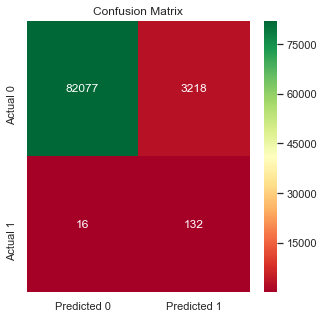

In [169]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(lr_prob_df.ActualCategory,lr_prob_df["LR_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(lr_prob_df.ActualCategory,lr_prob_df["LR_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Random Forest

In [202]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,random_state=rndm_stat)

# list of hyper params to tune
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4,5,10],'class_weight': ['balanced'],"n_jobs":[-1]}

# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)

rf_cv3 = GridSearchCV(estimator = rf, 
                        cv = folds,
                        param_grid = params, 
                        return_train_score=True,
                        scoring='recall',
                        verbose = 1,
                        n_jobs=-1)            
rf_cv3.fit(X_train_smote, y_train_smote)
# print best parameter after tuning 
print(rf_cv3.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(rf_cv3.best_estimator_)

print("Best recall: ", rf_cv3.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 46.7min finished


{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best recall:  0.9999949753793589


In [56]:
ranfor3 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
ranfor3.fit(X_train_smote, y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 100%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.76      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.91     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

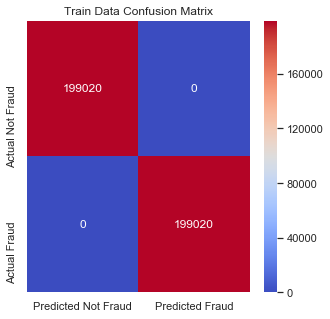

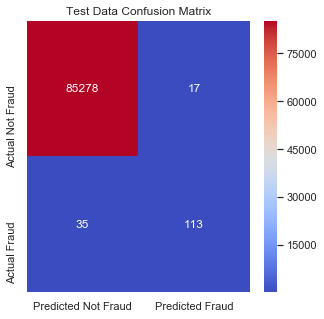

In [57]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = ranfor3.predict(X_train_smote)
trn_acc = accuracy_score(y_train_smote, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_smote, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_smote, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_smote, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = ranfor3.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [58]:
rf_prob = ranfor3.predict_proba(X_test_pt)[:,1]
rf_prob_df = pd.DataFrame({"ActualCategory":y_test,"RF_Pred_Prob":rf_prob})
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob
186882,0,0.0
165754,0,0.0
235285,0,0.0
101271,0,0.0
5832,0,0.0


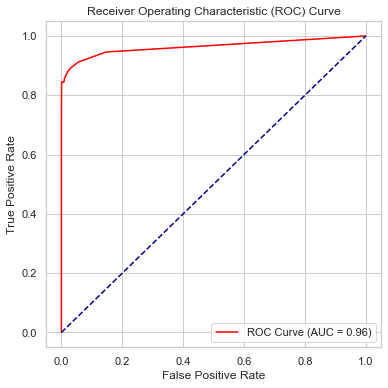

In [59]:
# plot the ROC Curve
plt_roc(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)

In [60]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
rf_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"RF"
    rf_prob_df[kloc] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df[kloc])
    rf_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(rf_prob_df.head())
display(rf_cut_df)

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF
186882,0,0.0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.853528,0.945946,0.853368,0.146632,0.011070,0.999890,0.021884
0.1,0.1,0.996407,0.844595,0.996670,0.003330,0.305623,0.999730,0.448833
0.2,0.2,0.998713,0.844595,0.998980,0.001020,0.589623,0.999730,0.694444
0.3,0.3,0.999204,0.837838,0.999484,0.000516,0.738095,0.999719,0.784810
0.4,0.4,0.999298,0.797297,0.999648,0.000352,0.797297,0.999648,0.797297
0.5,0.5,0.999391,0.763514,0.999801,0.000199,0.869231,0.999590,0.812950
0.6,0.6,0.999450,0.743243,0.999894,0.000106,0.924370,0.999555,0.823970
0.7,0.7,0.999473,0.729730,0.999941,0.000059,0.955752,0.999531,0.827586
0.8,0.8,0.999450,0.709459,0.999953,0.000047,0.963303,0.999496,0.817121
0.9,0.9,0.999204,0.547297,0.999988,0.000012,0.987805,0.999215,0.704348


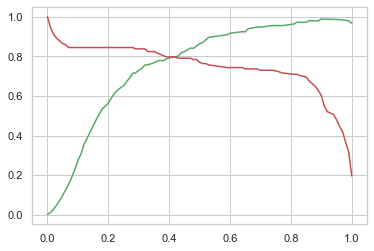

In [61]:
p, r, thresholds = metrics.precision_recall_curve(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [88]:
rf_prob_cut = 0.01
rf_prob_df["RF_Final_Pred"] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > rf_prob_cut else 0)
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF,RF_Final_Pred
186882,0,0.0,0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9443137530283346,

Sensitivity = 0.9121621621621622,

Specificity = 0.9443695410047482,

FPR = 0.05563045899525177,

Precision = 0.027663934426229508,

NPV = 0.9998386356019513,

F1 Score = 0.05369928400954654


(2.0, 0.0)

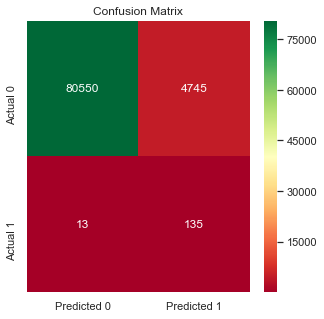

In [89]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### XGBOOST

In [212]:
alg = XGBClassifier(objective='binary:logistic')
# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)
clf3 = GridSearchCV(alg,{'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                    verbose=1, 
                    cv = folds,
                    scoring='recall')

clf3.fit(X_train_smote, y_train_smote)
print(clf3.best_score_, clf3.best_params_)
print(clf3.best_estimator_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 25.4min finished


0.9999949753793589 {'max_depth': 4, 'n_estimators': 200}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [90]:
xgboost3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgboost3.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###### Train Data - Prediction #####

****Train accuracy is 100%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199020

    accuracy                           1.00    398040
   macro avg       1.00      1.00      1.00    398040
weighted avg       1.00      1.00      1.00    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.998

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.45      0.80      0.58       148

    accuracy                           1.00     85443
   macro avg       0.72      0.90      0.79     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

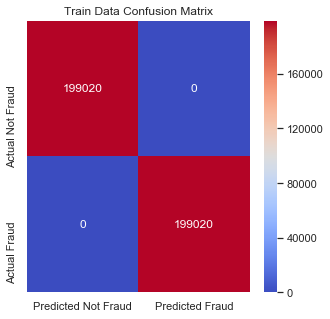

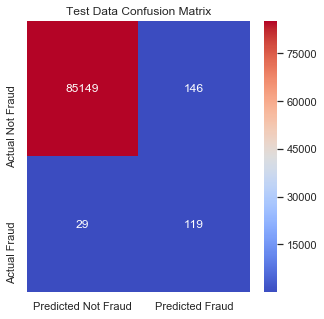

In [91]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = xgboost3.predict(X_train_smote)
trn_acc = accuracy_score(y_train_smote, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_smote, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_smote, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_smote, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = xgboost3.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [92]:
xg_prob = xgboost3.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob
186882,0,1.196970e-10
165754,0,1.334675e-06
235285,0,4.904797e-04
101271,0,3.750746e-06
5832,0,1.413239e-04


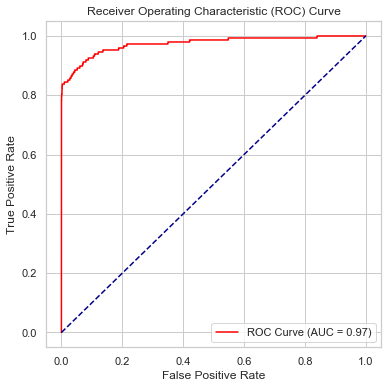

In [93]:
# plot the ROC Curve
plt_roc(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)

In [94]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(xg_prob_df.head())
display(xg_cut_df)

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG
186882,0,1.196970e-10,1,0,0,0,0,0,0,0,0,0
165754,0,1.334675e-06,1,0,0,0,0,0,0,0,0,0
235285,0,4.904797e-04,1,0,0,0,0,0,0,0,0,0
101271,0,3.750746e-06,1,0,0,0,0,0,0,0,0,0
5832,0,1.413239e-04,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.994569,0.837838,0.994841,0.005159,0.219858,0.999717,0.348315
0.2,0.2,0.995939,0.837838,0.996213,0.003787,0.277405,0.999718,0.416807
0.3,0.3,0.996840,0.831081,0.997128,0.002872,0.334239,0.999706,0.476744
0.4,0.4,0.997367,0.831081,0.997655,0.002345,0.380805,0.999706,0.522293
0.5,0.5,0.997952,0.804054,0.998288,0.001712,0.449057,0.999660,0.576271
0.6,0.6,0.998408,0.804054,0.998746,0.001254,0.526549,0.999660,0.636364
0.7,0.7,0.998818,0.797297,0.999168,0.000832,0.624339,0.999648,0.700297
0.8,0.8,0.999064,0.797297,0.999414,0.000586,0.702381,0.999648,0.746835
0.9,0.9,0.999345,0.783784,0.999719,0.000281,0.828571,0.999625,0.805556


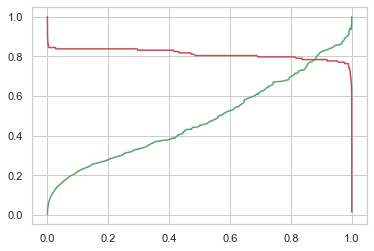

In [95]:
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [114]:
xg_prob_cut = 0.001
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG,XG_Final_Pred
186882,0,1.196970e-10,1,0,0,0,0,0,0,0,0,0,0
165754,0,1.334675e-06,1,0,0,0,0,0,0,0,0,0,0
235285,0,4.904797e-04,1,0,0,0,0,0,0,0,0,0,0
101271,0,3.750746e-06,1,0,0,0,0,0,0,0,0,0,0
5832,0,1.413239e-04,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.958849759488782,

Sensitivity = 0.8783783783783784,

Specificity = 0.9589893897649334,

FPR = 0.04101061023506653,

Precision = 0.03583241455347299,

NPV = 0.9997799914441117,

F1 Score = 0.06885593220338983


(2.0, 0.0)

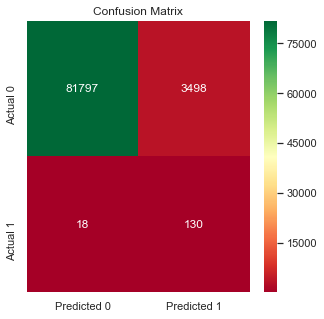

In [115]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### SVM

In [33]:
from sklearn.svm import SVC
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDClassifier

nystroem_features = Nystroem(gamma=.2,random_state=rndm_stat,n_components=300)
SVM_features = nystroem_features.fit_transform(X_train_smote)

svm = SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant", penalty=None, random_state=rndm_stat,n_jobs=-1)

# list of hyper params to tune
#params = {'penalty': ["l1","l2","elasticnet"],'loss':["hinge", "log", "modified_huber", "squared_hinge", "perceptron"]}
params = {'penalty': ["l1","l2","elasticnet"],'loss':["log", "modified_huber"]}


# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)

svm_cv = GridSearchCV(estimator = svm, 
                        cv = folds,
                        param_grid = params,
                        return_train_score=True,
                        verbose = 1,
                        n_jobs=-1,
                        scoring='recall',
                        refit=True)            
svm_cv.fit(SVM_features, y_train_smote)
# print best parameter after tuning 
print(svm_cv.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(svm_cv.best_estimator_)

#grid.fit(X_train_pt,y_train)
print("Best recall: ", svm_cv.best_score_)

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.2min finished


{'loss': 'log', 'penalty': 'l2'}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
Best recall:  0.9822178675509998


In [34]:
svm2 = SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
svm2.fit(X_train_smote,y_train_smote)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=1, fit_intercept=True,
              l1_ratio=0.15, learning_rate='constant', loss='log',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 94%

****F1 score is :  0.944

 classification_report : 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94    199020
           1       0.95      0.94      0.94    199020

    accuracy                           0.94    398040
   macro avg       0.94      0.94      0.94    398040
weighted avg       0.94      0.94      0.94    398040

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 95%

****F1 score is :  0.973

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.98     85295
           1       0.03      0.86      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.91      0.52     85443
weighted avg       1.00      0.95      0.97     85443



(2.0, 0.0)

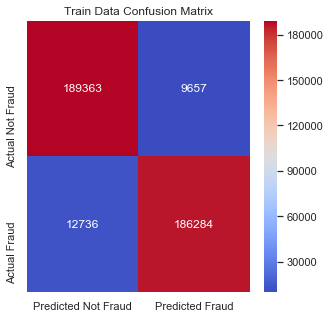

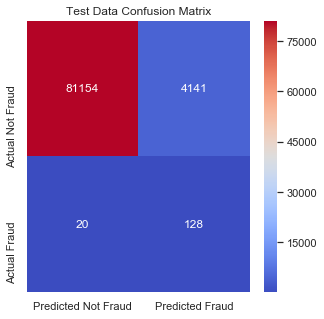

In [35]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = svm2.predict(X_train_smote)
trn_acc = accuracy_score(y_train_smote, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_smote, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_smote, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_smote, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = svm2.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [36]:
svm_prob = svm2.predict_proba(X_test_pt)[:,1]
svm_prob_df = pd.DataFrame({"ActualCategory":y_test,"SVM_Pred_Prob":svm_prob})
svm_prob_df.head()

,ActualCategory,SVM_Pred_Prob
186882,0,1.319222e-34
165754,0,3.110924e-03
235285,0,1.243890e-09
101271,0,9.781560e-07
5832,0,2.451216e-13


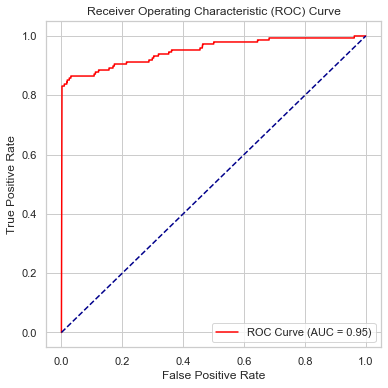

In [37]:
# plot the ROC Curve
plt_roc(svm_prob_df.ActualCategory,svm_prob_df.SVM_Pred_Prob)

In [38]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
svm_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"SVM"
    svm_prob_df[kloc] = svm_prob_df.SVM_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(svm_prob_df.ActualCategory,svm_prob_df[kloc])
    svm_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(svm_prob_df.head())
display(svm_cut_df)

,ActualCategory,SVM_Pred_Prob,0.0SVM,0.1SVM,0.2SVM,0.3SVM,0.4SVM,0.5SVM,0.6SVM,0.7SVM,0.8SVM,0.9SVM
186882,0,1.319222e-34,1,0,0,0,0,0,0,0,0,0
165754,0,3.110924e-03,1,0,0,0,0,0,0,0,0,0
235285,0,1.243890e-09,1,0,0,0,0,0,0,0,0,0
101271,0,9.781560e-07,1,0,0,0,0,0,0,0,0,0
5832,0,2.451216e-13,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.938743,0.864865,0.938871,0.061129,0.023961,0.999750,0.046630
0.2,0.2,0.943951,0.864865,0.944088,0.055912,0.026138,0.999752,0.050743
0.3,0.3,0.946970,0.864865,0.947113,0.052887,0.027592,0.999752,0.053478
0.4,0.4,0.949346,0.864865,0.949493,0.050507,0.028855,0.999753,0.055846
0.5,0.5,0.951301,0.864865,0.951451,0.048549,0.029984,0.999754,0.057958
0.6,0.6,0.953361,0.864865,0.953514,0.046486,0.031273,0.999754,0.060363
0.7,0.7,0.955479,0.864865,0.955636,0.044364,0.032720,0.999755,0.063054
0.8,0.8,0.957691,0.864865,0.957852,0.042148,0.034381,0.999755,0.066133
0.9,0.9,0.960594,0.864865,0.960760,0.039240,0.036835,0.999756,0.070660


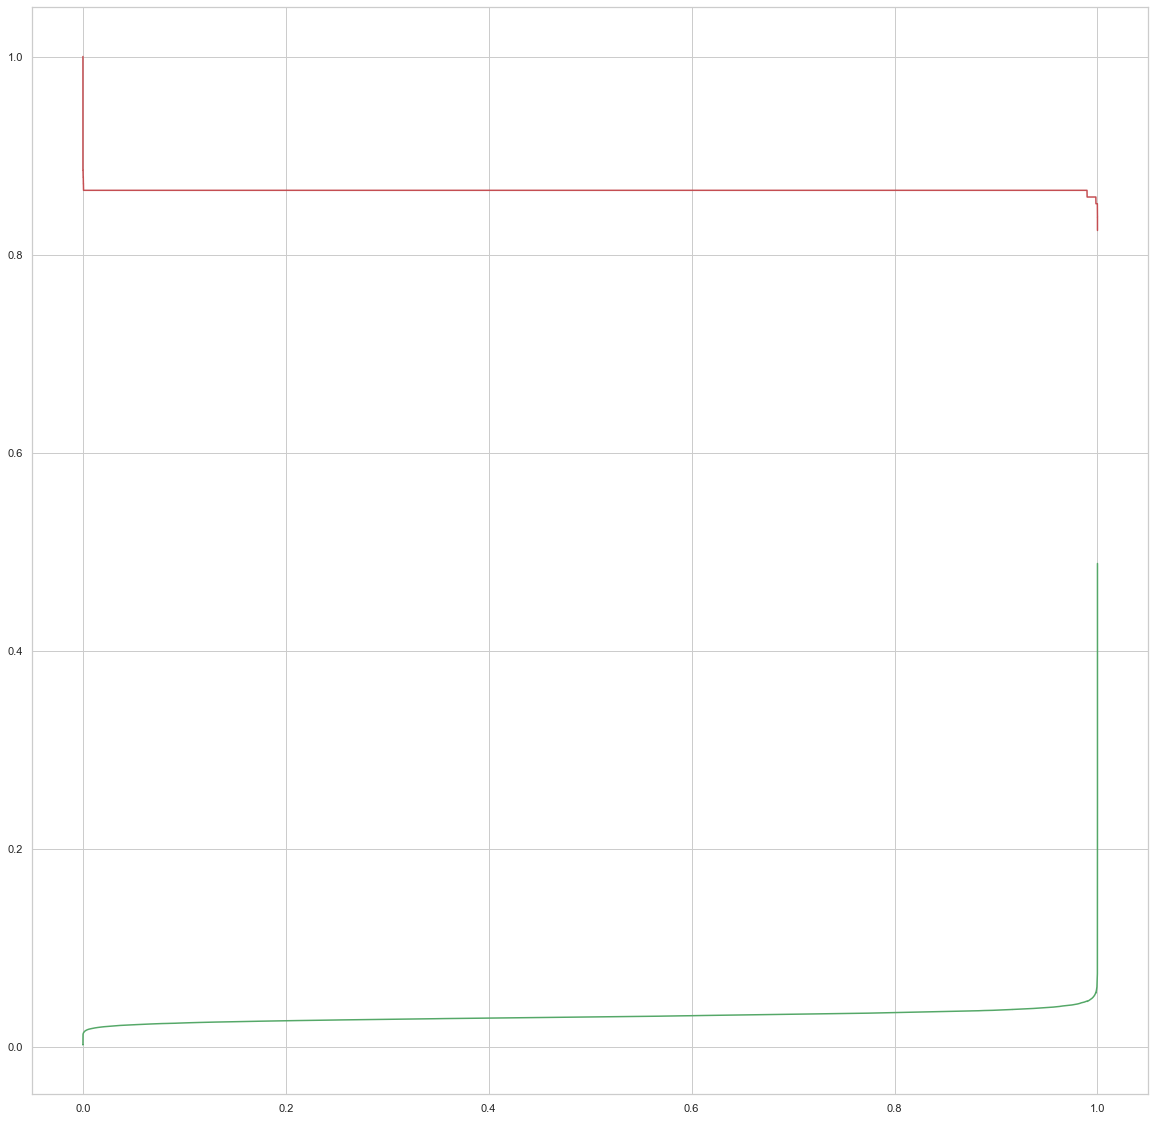

In [40]:
p, r, thresholds = metrics.precision_recall_curve(svm_prob_df.ActualCategory,svm_prob_df.SVM_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
#plt.show()

In [48]:
svm_prob_cut = 0.1
svm_prob_df["SVM_Final_Pred"] = svm_prob_df.SVM_Pred_Prob.map(lambda x: 1 if x > svm_prob_cut else 0)
svm_prob_df.head()

,ActualCategory,SVM_Pred_Prob,0.0SVM,0.1SVM,0.2SVM,0.3SVM,0.4SVM,0.5SVM,0.6SVM,0.7SVM,0.8SVM,0.9SVM,SVM_Final_Pred
186882,0,1.319222e-34,1,0,0,0,0,0,0,0,0,0,0
165754,0,3.110924e-03,1,0,0,0,0,0,0,0,0,0,0
235285,0,1.243890e-09,1,0,0,0,0,0,0,0,0,0,0
101271,0,9.781560e-07,1,0,0,0,0,0,0,0,0,0,0
5832,0,2.451216e-13,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9387427875893871,

Sensitivity = 0.8648648648648649,

Specificity = 0.9388709771967876,

FPR = 0.061129022803212384,

Precision = 0.023961063272182705,

NPV = 0.9997503152270258,

F1 Score = 0.04663023679417122


(2.0, 0.0)

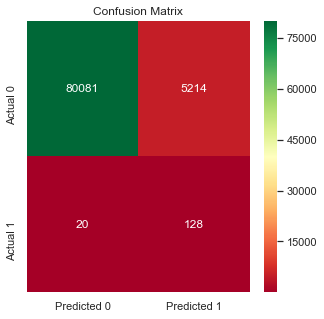

In [49]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(svm_prob_df.ActualCategory,svm_prob_df["SVM_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(svm_prob_df.ActualCategory,svm_prob_df["SVM_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### ADASYN

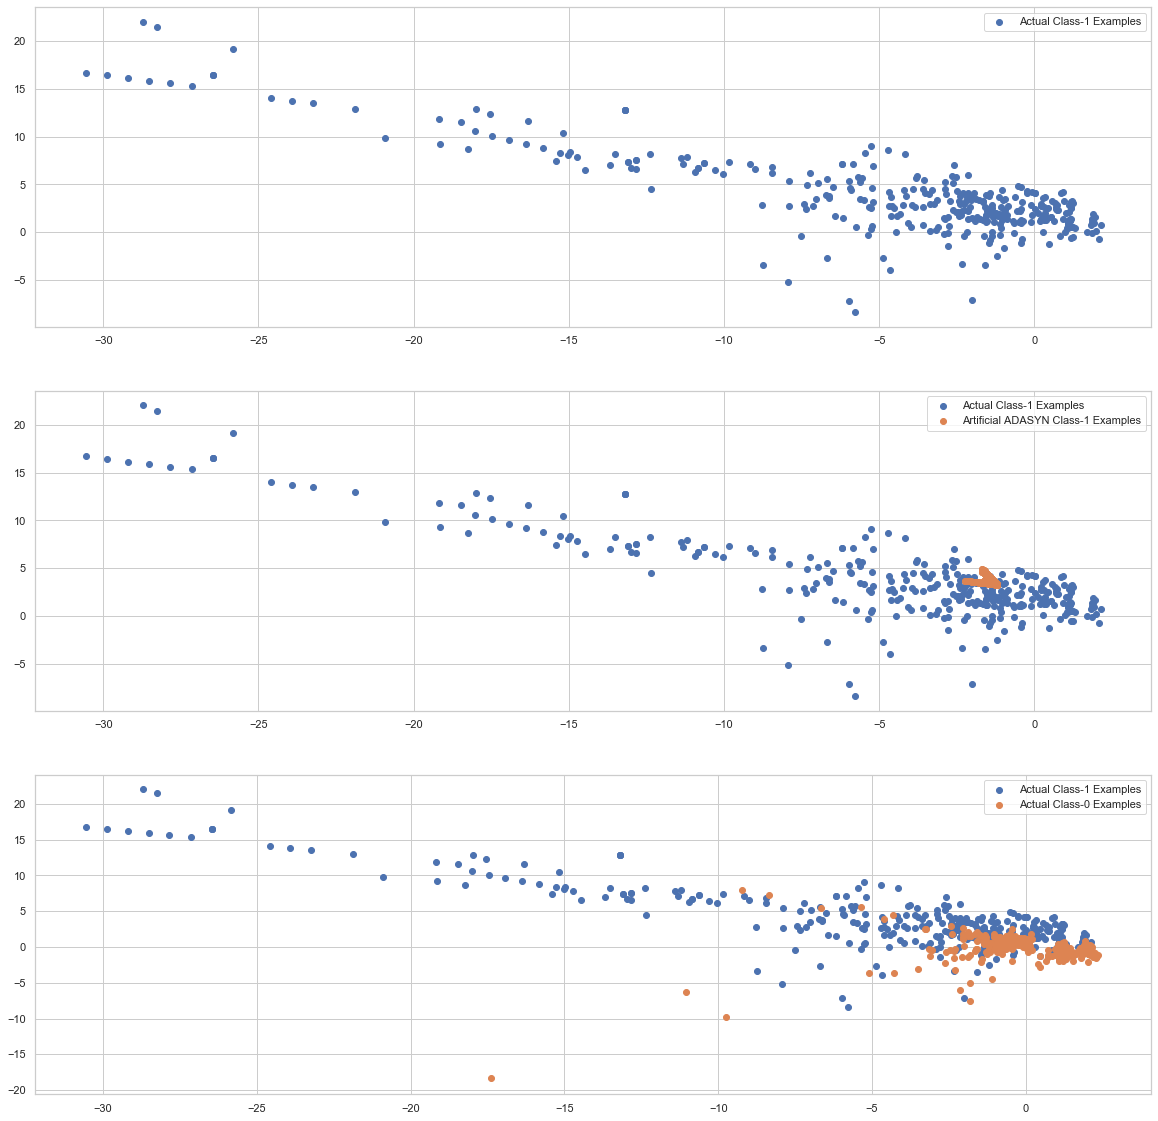

In [412]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train_pt, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1[:X_train_1.shape[0], 0], X_train_adasyn_1[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

Print the class distribution after applying ADASYN

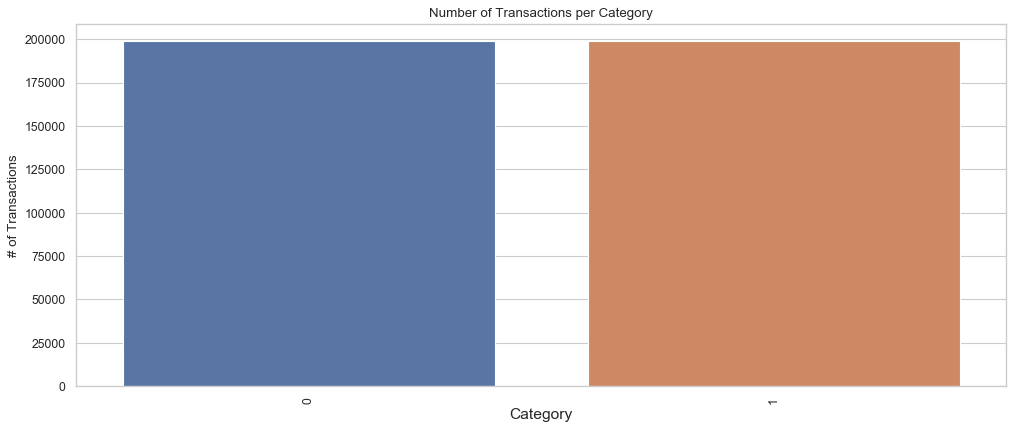

In [116]:
## Adasyn on Power-Transformed Data
adsyn = ADASYN(random_state = 0) 
X_train_adasyn, y_train_adasyn = adsyn.fit_sample(X_train_pt,y_train)
figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
sns.countplot(x= y_train_adasyn)
plt.title("Number of Transactions per Category")
plt.ylabel('# of Transactions', fontsize=12)
plt.xlabel('Category', fontsize=14)
plt.xticks(rotation='vertical')
plt.show()

#### Model Building
- Build different models on the balanced dataset and see the result

#### Logistic Regression

In [280]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-4,4,9)  #--> list of values
cv_num = StratifiedKFold(n_splits=4,random_state=42, shuffle = True) #--> list of values

In [284]:
#perform cross validation
cv = StratifiedKFold(n_splits=4,random_state=42, shuffle = True)

#perform hyperparameter tuning
grid={"C":np.logspace(-4,4,9), "penalty":["l1","l2","elasticnet"]}

#print the evaluation result by choosing a evaluation metric
logreg4=LogisticRegression(random_state=42, class_weight='balanced')
logreg_cv4=GridSearchCV(logreg4,grid,cv=cv, scoring='recall', n_jobs=-1)
logreg_cv4.fit(X_train_adasyn, y_train_adasyn)
print("Best recall: ", logreg_cv4.best_score_)

#print the optimum value of hyperparameters
print("tuned hpyerparameters :(best parameters) ",logreg_cv4.best_params_)
# print how our model looks after hyper-parameter tuning 
print(logreg_cv4.best_estimator_)

Best recall:  0.8935325682818498
tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
LogisticRegression(C=10.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [285]:
logreg4 = LogisticRegression(C=logreg_cv4.best_params_["C"],penalty=logreg_cv4.best_params_["penalty"],random_state=42,  n_jobs=-1)
logreg4.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 90%

****F1 score is :  0.908

 classification_report : 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91    199020
           1       0.92      0.89      0.91    199028

    accuracy                           0.91    398048
   macro avg       0.91      0.91      0.91    398048
weighted avg       0.91      0.91      0.91    398048

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Train accuracy is 92%

****F1 score is :  0.957

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96     85295
           1       0.02      0.91      0.04       148

    accuracy                           0.92     85443
   macro avg       0.51      0.91      0.50     85443
weighted avg       1.00      0.92      0.96     85443



(2.0, 0.0)

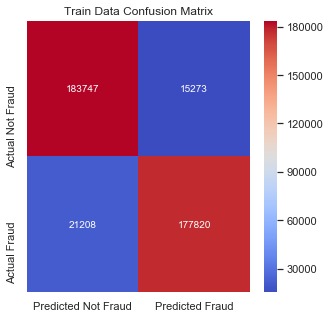

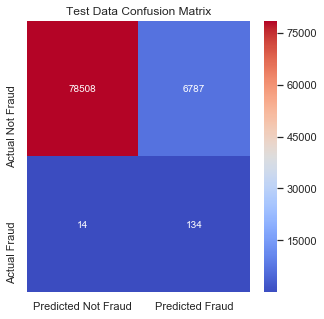

In [286]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = logreg4.predict(X_train_adasyn)
trn_acc = accuracy_score(y_train_adasyn, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_adasyn, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_adasyn, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_adasyn, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = logreg4.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1,random_state=rndm_stat)

# list of hyper params to tune
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4,5,10],'class_weight': ['balanced'],"n_jobs":[-1]}

# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)

rf_cv4 = GridSearchCV(estimator = rf, 
                        cv = folds,
                        param_grid = params, 
                        return_train_score=True,
                        scoring='recall',
                        verbose = 1,
                        n_jobs=-1)            
rf_cv4.fit(X_train_adasyn, y_train_adasyn)
# print best parameter after tuning 
print(rf_cv4.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(rf_cv4.best_estimator_)

print("Best recall: ", rf_cv4.best_score_)

Fitting 4 folds for each of 8 candidates, totalling 32 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed: 54.4min finished


{'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'n_jobs': -1}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Best recall:  1.0


In [288]:
ranfor4 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
ranfor4.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

###### Train Data - Prediction #####

****Train accuracy is 100%

****F1 score is :  1.0

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199028

    accuracy                           1.00    398048
   macro avg       1.00      1.00      1.00    398048
weighted avg       1.00      1.00      1.00    398048

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.87      0.75      0.81       148

    accuracy                           1.00     85443
   macro avg       0.94      0.87      0.90     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

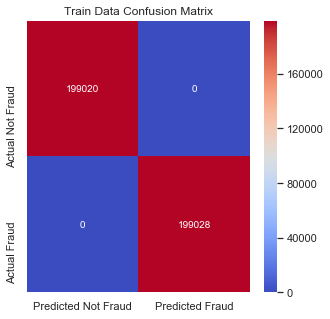

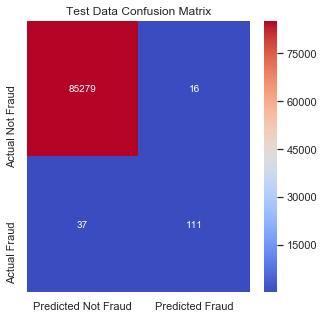

In [289]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = ranfor4.predict(X_train_adasyn)
trn_acc = accuracy_score(y_train_adasyn, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_adasyn, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_adasyn, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_adasyn, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = ranfor4.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [290]:
rf_prob = ranfor4.predict_proba(X_test_pt)[:,1]
rf_prob_df = pd.DataFrame({"ActualCategory":y_test,"RF_Pred_Prob":rf_prob})
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob
186882,0,0.0
165754,0,0.0
235285,0,0.0
101271,0,0.0
5832,0,0.0


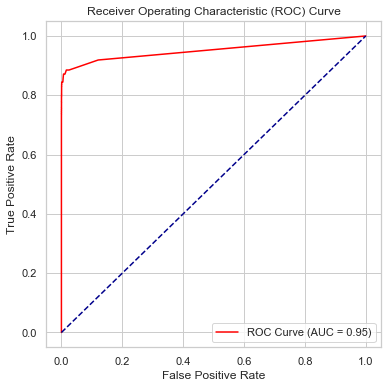

In [291]:
# plot the ROC Curve
plt_roc(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)

In [292]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
rf_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"RF"
    rf_prob_df[kloc] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df[kloc])
    rf_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(rf_prob_df.head())
display(rf_cut_df)

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF
186882,0,0.0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.879370,0.918919,0.879301,0.120699,0.013038,0.999840,0.025711
0.1,0.1,0.996477,0.844595,0.996741,0.003259,0.310174,0.999730,0.453721
0.2,0.2,0.998771,0.837838,0.999050,0.000950,0.604878,0.999718,0.702550
0.3,0.3,0.999146,0.804054,0.999484,0.000516,0.730061,0.999660,0.765273
0.4,0.4,0.999356,0.797297,0.999707,0.000293,0.825175,0.999648,0.810997
0.5,0.5,0.999380,0.750000,0.999812,0.000188,0.874016,0.999566,0.807273
0.6,0.6,0.999462,0.736486,0.999918,0.000082,0.939655,0.999543,0.825758
0.7,0.7,0.999438,0.702703,0.999953,0.000047,0.962963,0.999484,0.812500
0.8,0.8,0.999321,0.621622,0.999977,0.000023,0.978723,0.999344,0.760331
0.9,0.9,0.999146,0.513514,0.999988,0.000012,0.987013,0.999157,0.675556


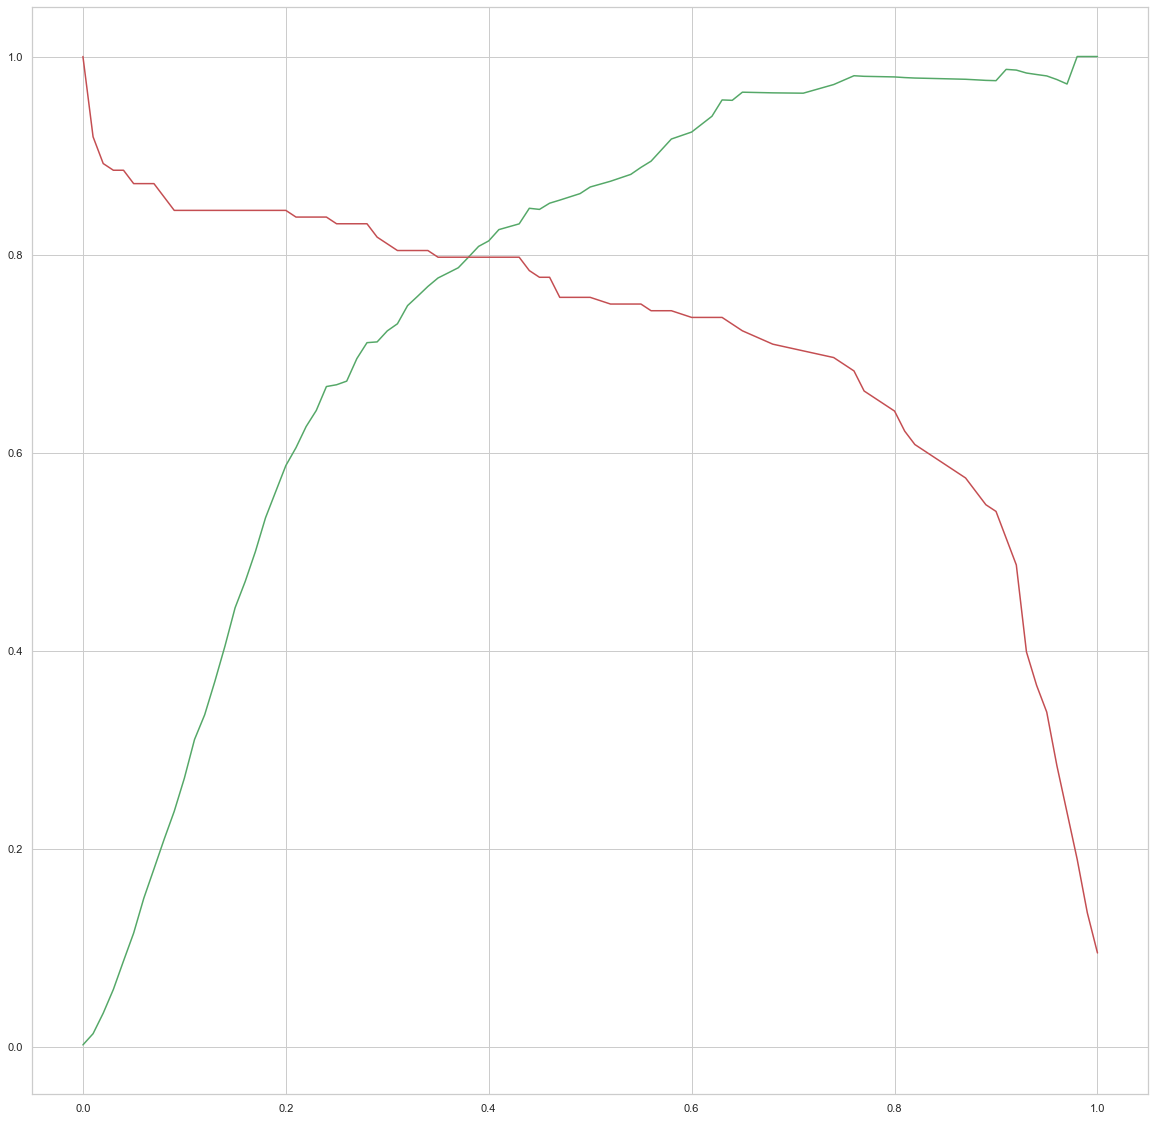

In [293]:
p, r, thresholds = metrics.precision_recall_curve(rf_prob_df.ActualCategory,rf_prob_df.RF_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [318]:
rf_prob_cut = 0.01
rf_prob_df["RF_Final_Pred"] = rf_prob_df.RF_Pred_Prob.map(lambda x: 1 if x > rf_prob_cut else 0)
rf_prob_df.head()

,ActualCategory,RF_Pred_Prob,0.0RF,0.1RF,0.2RF,0.3RF,0.4RF,0.5RF,0.6RF,0.7RF,0.8RF,0.9RF,RF_Final_Pred
186882,0,0.0,0,0,0,0,0,0,0,0,0,0,0
165754,0,0.0,0,0,0,0,0,0,0,0,0,0,0
235285,0,0.0,0,0,0,0,0,0,0,0,0,0,0
101271,0,0.0,0,0,0,0,0,0,0,0,0,0,0
5832,0,0.0,0,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9555961284130942,

Sensitivity = 0.8918918918918919,

Specificity = 0.9557066651034645,

FPR = 0.04429333489653555,

Precision = 0.03375959079283888,

NPV = 0.9998037604405579,

F1 Score = 0.06505667816658453


(2.0, 0.0)

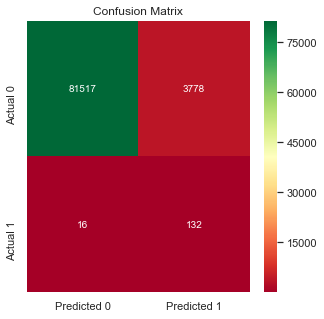

In [319]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(rf_prob_df.ActualCategory,rf_prob_df["RF_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### XGBOOST

In [321]:
alg = XGBClassifier(objective='binary:logistic')
# cross validation
folds = StratifiedKFold(n_splits = 4, shuffle = True, random_state = rndm_stat)
clf4 = GridSearchCV(alg,{'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, 
                    verbose=1, 
                    cv = folds,
                    scoring='recall',n_jobs=-1)

clf4.fit(X_train_adasyn, y_train_adasyn)
print(clf4.best_score_, clf4.best_params_)
print(clf4.best_estimator_)

Fitting 4 folds for each of 9 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 33.8min finished


1.0 {'max_depth': 4, 'n_estimators': 100}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [117]:
xgboost4 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
xgboost4.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

###### Train Data - Prediction #####

****Train accuracy is 99%

****F1 score is :  0.999

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       1.00      1.00      1.00    199028

    accuracy                           1.00    398048
   macro avg       1.00      1.00      1.00    398048
weighted avg       1.00      1.00      1.00    398048

----------------------------------------------------------------------------------------------------
###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.997

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.24      0.82      0.37       148

    accuracy                           1.00     85443
   macro avg       0.62      0.91      0.69     85443
weighted avg       1.00      1.00      1.00     85443



(2.0, 0.0)

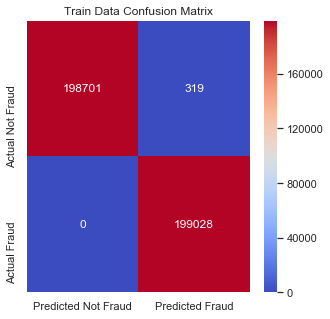

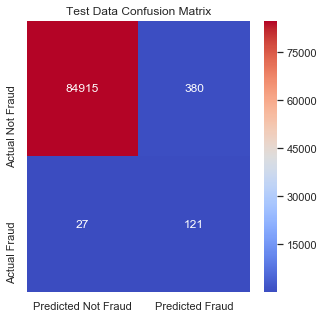

In [118]:
# Train Data - Prediction
print("###### Train Data - Prediction #####")
y_hat_train = xgboost4.predict(X_train_adasyn)
trn_acc = accuracy_score(y_train_adasyn, y_hat_train, normalize=True) * float(100)
print('\n****Train accuracy is %d%%' % (trn_acc))
# Finding the F1 Score
trn_f1score = f1_score(y_train_adasyn, y_hat_train, average='weighted')
print ("\n****F1 score is : ",round(trn_f1score,3))

print("\n classification_report : \n",classification_report(y_train_adasyn, y_hat_train))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_train_adasyn, y_hat_train).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Train Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

print("-"* 100)

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = xgboost4.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [119]:
xg_prob = xgboost4.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob
186882,0,2.605696e-07
165754,0,1.522412e-04
235285,0,2.009403e-02
101271,0,1.011923e-04
5832,0,4.495466e-03


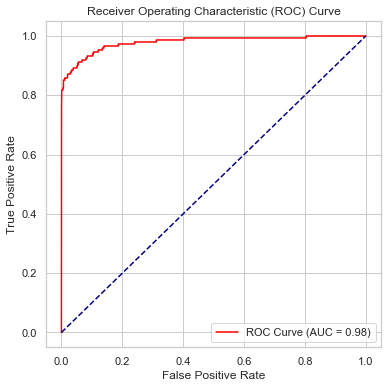

In [120]:
# plot the ROC Curve
plt_roc(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)

In [121]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(xg_prob_df.head())
display(xg_cut_df)

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG
186882,0,2.605696e-07,1,0,0,0,0,0,0,0,0,0
165754,0,1.522412e-04,1,0,0,0,0,0,0,0,0,0
235285,0,2.009403e-02,1,0,0,0,0,0,0,0,0,0
101271,0,1.011923e-04,1,0,0,0,0,0,0,0,0,0
5832,0,4.495466e-03,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.984832,0.858108,0.985052,0.014948,0.090585,0.999750,0.163871
0.2,0.2,0.990263,0.851351,0.990504,0.009496,0.134615,0.999740,0.232472
0.3,0.3,0.992732,0.851351,0.992977,0.007023,0.173793,0.999740,0.288660
0.4,0.4,0.994183,0.824324,0.994478,0.005522,0.205734,0.999694,0.329285
0.5,0.5,0.995237,0.817568,0.995545,0.004455,0.241517,0.999682,0.372881
0.6,0.6,0.996208,0.817568,0.996518,0.003482,0.289474,0.999682,0.427562
0.7,0.7,0.997261,0.817568,0.997573,0.002427,0.368902,0.999683,0.508403
0.8,0.8,0.998221,0.817568,0.998534,0.001466,0.491870,0.999683,0.614213
0.9,0.9,0.998912,0.790541,0.999273,0.000727,0.653631,0.999636,0.715596


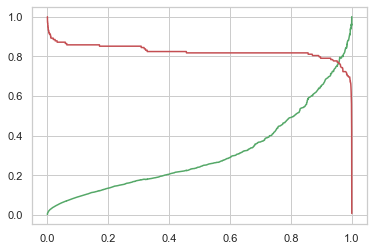

In [122]:
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [143]:
xg_prob_cut = 0.01
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG,XG_Final_Pred
186882,0,2.605696e-07,1,0,0,0,0,0,0,0,0,0,0
165754,0,1.522412e-04,1,0,0,0,0,0,0,0,0,0,0
235285,0,2.009403e-02,1,0,0,0,0,0,0,0,0,0,1
101271,0,1.011923e-04,1,0,0,0,0,0,0,0,0,0,0
5832,0,4.495466e-03,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9458352351860304,

Sensitivity = 0.9054054054054054,

Specificity = 0.9459053871856498,

FPR = 0.0540946128143502,

Precision = 0.02822240943555181,

NPV = 0.9998265072185389,

F1 Score = 0.05473856209150327


(2.0, 0.0)

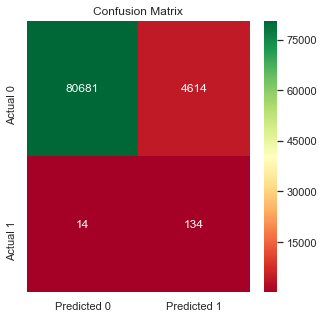

In [144]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Select the oversampling method which shows the best result on a model
- Apply the best hyperparameter on the model
- Predict on the test dataset

### Model Evaluation Metrics 

* The objective is to build a machine learning model to predict the Fraud trasactions to avoid business loss.  With the given data it is possible to predict which transaction is fraudulent, which is not and then inform the customer accordignly. As we have different models, we can choose following metrics for evaluation.

1.	The train and test scores should be high.
2.  There should not be much variation between train scores and test scores. High train and low test suggests that its a overfit model.
3.  We should target to 
       -  __have high Recall and high Precision which suggest that model is able to predict True Fraud transactions correctly__
       -  __have high Recall and low Precision is good model which suggest that model is able to predict True Fraud Transactions correclty along with some non fraud transactions in it.__
       -  We reject the model which is having low Recall and Low Precision or low Recall and high Precision for obvious reasons as model is very bad model.

### __Model Selection & Conclusions__


We Choose the model XGBOOST with ADASYN as our final model to predict the fraud transactions for the following reasons.

1) Test and Train Recall scores are close enough suggesting that its not overfit.

2) __The Recall / Sensitivity score on test (0.91) is high suggesting that the model is able to predict true fraud transactions correctly.__

3)  __The Precision Score on is 0.02. High Recall and Low Precision is Ok model which suggest that model is able to predict True Fraud transactions along with some non fraud transactions in it. We should have a higher precision to have best model with less misclassifications. Here we observe that model prediction has non frauds  in to it as we have choosen to given more weight towards RECALL. If we compromise with Recall, we could improve precision. Infact with default probabiltiy cutoff, we have RECALL at 0.85 and Precision at 0.24.__

4) When we have analyzed the amount column, we could clearly see that the average transaction value for fraud transactions is (122 EUR) 40% higher wrt non fraud transactions (88 EUR). The fraud transaction amount varies from EUR 1 till EUR 2122 and has Standard Deviation of EUR 250. For non fraud transactions, the standard deviation is same as 250 EUR and average transaction amount is EUR 88.  The data given is around 2 days data. With the above EDA, we think that the institute looses higher money for each of the fraudulent transaction and it leads to loosing of customers and business.

5) Considering the above fact, we have given higher weightage to Recall by compromising with Precision. Lower Precision leads to considerable number of non fraud transactions being detected as fraud transactions.

__How should we solve the problem of lower Precision?__ We could have a business solution to inform and validate the customers with automated voice calling or automated app notification to approve the transaction. This can be marketed as security feature to customers and it would not only avoid fraud transactions, but it would also gain customers trust and brings more customers.



### Build the best model

###### Test Data - Prediction #####

****Test accuracy is 99%

****F1 score is :  0.997

 classification_report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.24      0.82      0.37       148

    accuracy                           1.00     85443
   macro avg       0.62      0.91      0.69     85443
weighted avg       1.00      1.00      1.00     85443

#print the evaluation score on the X_test by choosing the best evaluation metric
Recall :  0.82


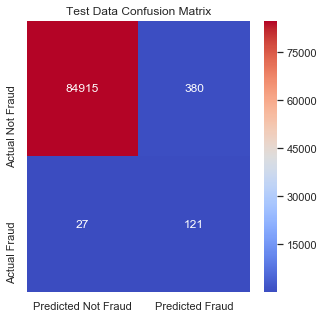

In [212]:
# perform the best oversampling method on X_train & y_train

clf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) #initialise the model with optimum hyperparameters
clf.fit(X_train_adasyn, y_train_adasyn)# fit on the balanced dataset

# Test Data - Prediction
print("###### Test Data - Prediction #####")
y_hat_test = clf.predict(X_test_pt)
tst_acc = accuracy_score(y_test, y_hat_test, normalize=True) * float(100)
print('\n****Test accuracy is %d%%' % (tst_acc))
# Finding the F1 Score
tst_f1score = f1_score(y_test, y_hat_test, average='weighted')
print ("\n****F1 score is : ",round(tst_f1score,3))

print("\n classification_report : \n",classification_report(y_test, y_hat_test))
# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(y_test, y_hat_test).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual Not Fraud","Actual Fraud"],\
                 xticklabels=["Predicted Not Fraud","Predicted Fraud"],annot = True,fmt='d',cmap='coolwarm')
ax.set_title('Test Data Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
print("#print the evaluation score on the X_test by choosing the best evaluation metric")
print("Recall : ",round(tp/(tp+fn),2))

In [213]:
print("#print the evaluation score on the X_test by choosing the best evaluation metric")
print("Recall : ",round(tp/(tp+fn),2))

#print the evaluation score on the X_test by choosing the best evaluation metric
Recall :  0.82


### Print the important features of the best model to understand the dataset

Top var = 14
2nd Top var = 4
3rd Top var = 8


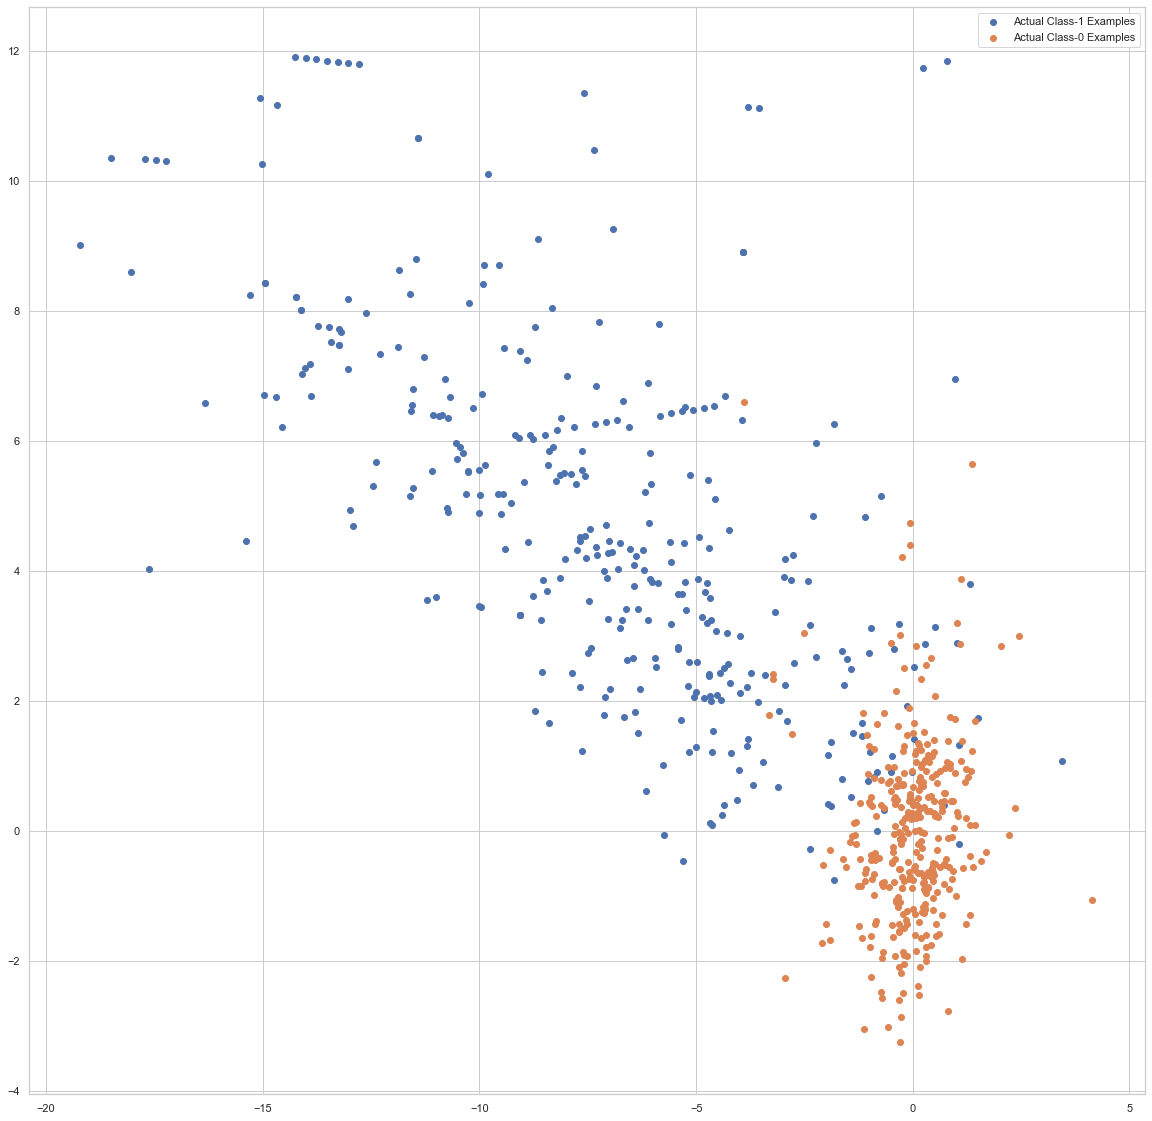

In [214]:
var_imp = []
for i in clf.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(clf.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(clf.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(clf.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
#### Print the FPR,TPR & select the best threshold from the roc curve

In [215]:
xg_prob = clf.predict_proba(X_test_pt)[:,1]
xg_prob_df = pd.DataFrame({"ActualCategory":y_test,"XG_Pred_Prob":xg_prob})
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob
186882,0,2.605696e-07
165754,0,1.522412e-04
235285,0,2.009403e-02
101271,0,1.011923e-04
5832,0,4.495466e-03


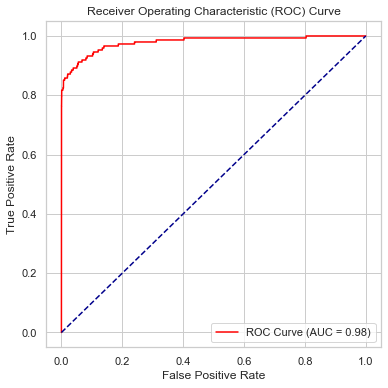

In [216]:
# plot the ROC Curve
plt_roc(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)

In [217]:
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
xg_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]

display(xg_prob_df.head())
display(xg_cut_df)

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG
186882,0,2.605696e-07,1,0,0,0,0,0,0,0,0,0
165754,0,1.522412e-04,1,0,0,0,0,0,0,0,0,0
235285,0,2.009403e-02,1,0,0,0,0,0,0,0,0,0
101271,0,1.011923e-04,1,0,0,0,0,0,0,0,0,0
5832,0,4.495466e-03,1,0,0,0,0,0,0,0,0,0


,Prob,Accuracy,Sensitivity,Specificity,FPR,Prcesion,NPV,F1_Scr
0.0,0.0,0.001732,1.000000,0.000000,1.000000,0.001732,NaN,0.003458
0.1,0.1,0.984832,0.858108,0.985052,0.014948,0.090585,0.999750,0.163871
0.2,0.2,0.990263,0.851351,0.990504,0.009496,0.134615,0.999740,0.232472
0.3,0.3,0.992732,0.851351,0.992977,0.007023,0.173793,0.999740,0.288660
0.4,0.4,0.994183,0.824324,0.994478,0.005522,0.205734,0.999694,0.329285
0.5,0.5,0.995237,0.817568,0.995545,0.004455,0.241517,0.999682,0.372881
0.6,0.6,0.996208,0.817568,0.996518,0.003482,0.289474,0.999682,0.427562
0.7,0.7,0.997261,0.817568,0.997573,0.002427,0.368902,0.999683,0.508403
0.8,0.8,0.998221,0.817568,0.998534,0.001466,0.491870,0.999683,0.614213
0.9,0.9,0.998912,0.790541,0.999273,0.000727,0.653631,0.999636,0.715596


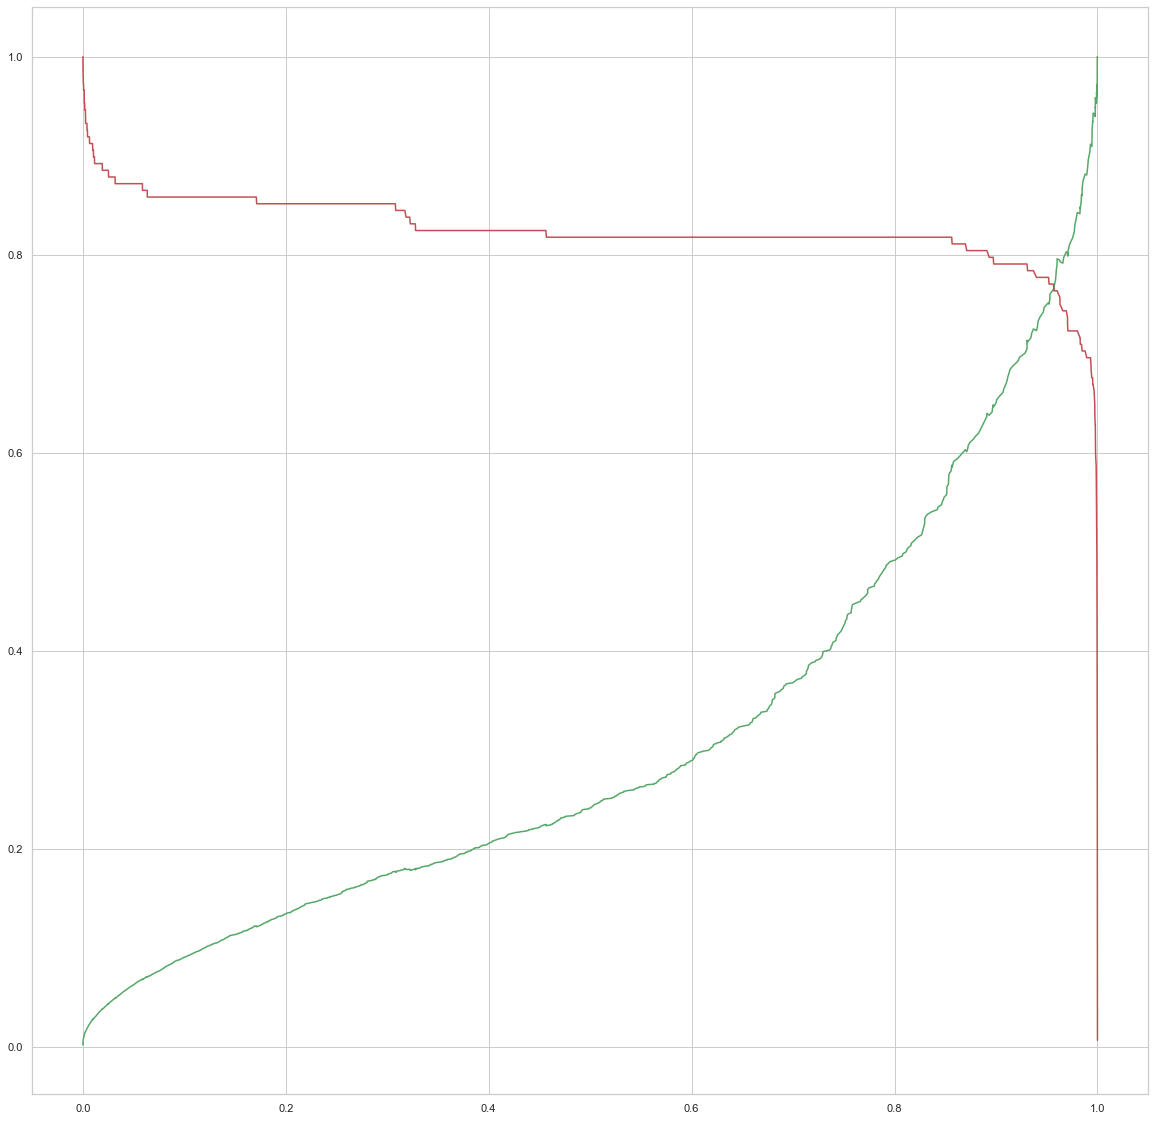

In [218]:
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)
# Plot Precision - Recall Curve
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [219]:
xg_prob_cut = 0.01
xg_prob_df["XG_Final_Pred"] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > xg_prob_cut else 0)
xg_prob_df.head()

,ActualCategory,XG_Pred_Prob,0.0XG,0.1XG,0.2XG,0.3XG,0.4XG,0.5XG,0.6XG,0.7XG,0.8XG,0.9XG,XG_Final_Pred
186882,0,2.605696e-07,1,0,0,0,0,0,0,0,0,0,0
165754,0,1.522412e-04,1,0,0,0,0,0,0,0,0,0,0
235285,0,2.009403e-02,1,0,0,0,0,0,0,0,0,0,1
101271,0,1.011923e-04,1,0,0,0,0,0,0,0,0,0,0
5832,0,4.495466e-03,1,0,0,0,0,0,0,0,0,0,0


Accuracy= 0.9458352351860304,

Sensitivity = 0.9054054054054054,

Specificity = 0.9459053871856498,

FPR = 0.0540946128143502,

Precision = 0.02822240943555181,

NPV = 0.9998265072185389,

F1 Score = 0.05473856209150327


(2.0, 0.0)

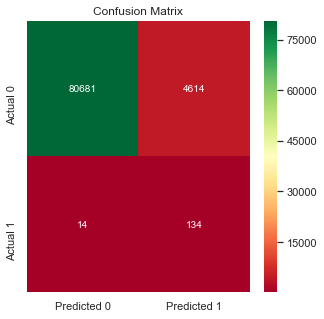

In [220]:
# Calculate metrics for final cutoff
acc,sen,spec,fpr,prec,npv,f1_scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"])
print("Accuracy= {},\n\nSensitivity = {},\n\nSpecificity = {},\n\nFPR = {},\n\nPrecision = {},\n\nNPV = {},\n\nF1 Score = {}".format(acc,sen,spec,fpr,prec,npv,f1_scr))

# Visualize the confusion matrix
plt.figure(figsize = (5,5))
tn, fp, fn, tp = confusion_matrix(xg_prob_df.ActualCategory,xg_prob_df["XG_Final_Pred"]).ravel()
ax = sns.heatmap([[tn,fp],[fn,tp]],yticklabels=["Actual 0","Actual 1"],\
                 xticklabels=["Predicted 0","Predicted 1"],annot = True,fmt='d',cmap='RdYlGn')
ax.set_title('Confusion Matrix')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Determine the Threshold value

In [221]:
print('Test auc =', metrics.roc_auc_score(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob))
fpr, tpr, thresholds = metrics.roc_curve(xg_prob_df["ActualCategory"],xg_prob_df["XG_Pred_Prob"],drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Test auc = 0.9788230196313905
0.009532565


In [222]:
rf_prob = clf.predict_proba(X_train_pt)[:,1]
rf_prob_df = pd.DataFrame({"ActualCategory":y_train,"XG_Pred_Prob":rf_prob})
# Predictions at different cutoff values
met_cols = ["Prob","Accuracy","Sensitivity","Specificity","FPR","Prcesion","NPV","F1_Scr"]
XG_cut_df = pd.DataFrame( columns = met_cols)
for i in range(10):
    k = i/10
    kloc = str(k)+"XG"
    xg_prob_df[kloc] = xg_prob_df.XG_Pred_Prob.map(lambda x: 1 if x > k else 0)
    ac,se,sp,fpra,prcn,nprv,f1scr = logr_metrics(xg_prob_df.ActualCategory,xg_prob_df[kloc])
    xg_cut_df.loc[k] = [k,ac,se,sp,fpra,prcn,nprv,f1scr]
p, r, thresholds = metrics.precision_recall_curve(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob)


In [223]:
print('Train auc =', metrics.roc_auc_score(xg_prob_df.ActualCategory,xg_prob_df.XG_Pred_Prob))
fpr, tpr, thresholds = metrics.roc_curve(xg_prob_df["ActualCategory"],xg_prob_df["XG_Pred_Prob"],drop_intermediate = False)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9788230196313905
0.009532565
